In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
df = pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

le = LabelEncoder()

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])


In [6]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [37]:
 convert(4.562174)

4

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [8]:
df.shape


(545, 13)

In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
df.duplicated().sum()

0

# Normalization

In [11]:
df = df.iloc[:,:]
df = (df - df.mean())/df.std()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-1.404995
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-1.404995
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,-0.091578
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-1.404995
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-1.404995


# Select X Labels

In [12]:
X = df.iloc[:, 1:]

In [13]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-1.404995
1,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-1.404995
2,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,-0.091578
3,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-1.404995
4,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-1.404995


# Select Y Labels

In [14]:
Y = df.iloc[: ,0]

In [15]:
Y.head()

0    4.562174
1    4.000809
2    4.000809
3    3.982096
4    3.551716
Name: price, dtype: float64

In [16]:
X_arr = X.values
Y_arr = Y.values

In [17]:
X_arr

array([[ 1.04576555,  1.40213123,  1.42050672, ...,  1.51629947,
         1.80328447, -1.40499497],
       [ 1.75539685,  1.40213123,  5.4008469 , ...,  2.67695005,
        -0.55352617, -1.40499497],
       [ 2.2161964 ,  0.04723492,  1.42050672, ...,  1.51629947,
         1.80328447, -0.09157772],
       ...,
       [-0.70527273, -1.30766139, -0.56966336, ..., -0.80500169,
        -0.55352617,  1.22183953],
       [-1.03244041,  0.04723492, -0.56966336, ..., -0.80500169,
        -0.55352617, -1.40499497],
       [-0.59928883,  0.04723492, -0.56966336, ..., -0.80500169,
        -0.55352617,  1.22183953]])

In [18]:
Y_arr

array([ 4.56217388e+00,  4.00080852e+00,  4.00080852e+00,  3.98209634e+00,
        3.55171624e+00,  3.25232138e+00,  2.87807781e+00,  2.87807781e+00,
        2.72838038e+00,  2.69095602e+00,  2.69095602e+00,  2.62733462e+00,
        2.42898553e+00,  2.39156117e+00,  2.39156117e+00,  2.31671245e+00,
        2.31671245e+00,  2.24186374e+00,  2.20443938e+00,  2.18572720e+00,
        2.12959067e+00,  2.09216631e+00,  2.07345413e+00,  2.07345413e+00,
        2.03602978e+00,  2.01731760e+00,  1.97615081e+00,  1.94246888e+00,
        1.94246888e+00,  1.94246888e+00,  1.94246888e+00,  1.94246888e+00,
        1.88633235e+00,  1.83019581e+00,  1.79277146e+00,  1.77188866e+00,
        1.75160466e+00,  1.71792274e+00,  1.70856665e+00,  1.68049838e+00,
        1.66178621e+00,  1.64307403e+00,  1.56822531e+00,  1.56822531e+00,
        1.49337660e+00,  1.49337660e+00,  1.47466442e+00,  1.45595224e+00,
        1.43724006e+00,  1.41852789e+00,  1.41852789e+00,  1.41852789e+00,
        1.38110353e+00,  

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_arr,Y_arr,test_size=0.25,random_state=3)

In [20]:
X_train.shape

(408, 12)

# Create the Model

In [21]:
def get_model():
    model = Sequential([
        Dense(10,input_shape=(12,),activation='relu'),
        Dense(20,activation='relu'),
        Dense(5,activation='relu'),
        Dense(1)
    ])
    
    model.compile(
    loss='mse',
    optimizer='adadelta'
    )
    
    return model

In [22]:
model = get_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



#  Model Training

In [23]:
model = get_model()
preds_on_untrained = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [24]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=12600
)

Epoch 1/12600

13/13 [==============================] - 2s 30ms/step - loss: 1.4363 - val_loss: 1.0327
Epoch 2/12600
13/13 [==============================] - 0s 10ms/step - loss: 1.4359 - val_loss: 1.0324
Epoch 3/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.4355 - val_loss: 1.0321
Epoch 4/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.4351 - val_loss: 1.0317
Epoch 5/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.4347 - val_loss: 1.0314
Epoch 6/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.4343 - val_loss: 1.0311
Epoch 7/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.4338 - val_loss: 1.0307
Epoch 8/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.4334 - val_loss: 1.0304
Epoch 9/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.4330 - val_loss: 1.0301
Epoch 10/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.4326 - val

13/13 [==============================] - 0s 7ms/step - loss: 1.4073 - val_loss: 1.0098
Epoch 80/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.4069 - val_loss: 1.0095
Epoch 81/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.4066 - val_loss: 1.0092
Epoch 82/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.4062 - val_loss: 1.0089
Epoch 83/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.4059 - val_loss: 1.0086
Epoch 84/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.4055 - val_loss: 1.0083
Epoch 85/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.4051 - val_loss: 1.0081
Epoch 86/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.4048 - val_loss: 1.0078
Epoch 87/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.4044 - val_loss: 1.0075
Epoch 88/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.4041 - val_loss: 1.

Epoch 159/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3795 - val_loss: 0.9879
Epoch 160/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3792 - val_loss: 0.9876
Epoch 161/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3788 - val_loss: 0.9874
Epoch 162/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3785 - val_loss: 0.9871
Epoch 163/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3782 - val_loss: 0.9868
Epoch 164/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3778 - val_loss: 0.9866
Epoch 165/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3775 - val_loss: 0.9863
Epoch 166/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3772 - val_loss: 0.9861
Epoch 167/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3768 - val_loss: 0.9858
Epoch 168/12600
13/13 [==============================] - 0s 7ms/step - lo

13/13 [==============================] - 0s 7ms/step - loss: 1.3539 - val_loss: 0.9679
Epoch 239/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3536 - val_loss: 0.9677
Epoch 240/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3533 - val_loss: 0.9674
Epoch 241/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3530 - val_loss: 0.9672
Epoch 242/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3527 - val_loss: 0.9669
Epoch 243/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3523 - val_loss: 0.9667
Epoch 244/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3520 - val_loss: 0.9664
Epoch 245/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3517 - val_loss: 0.9662
Epoch 246/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3514 - val_loss: 0.9660
Epoch 247/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3511 - val

13/13 [==============================] - 0s 8ms/step - loss: 1.3297 - val_loss: 0.9490
Epoch 318/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3294 - val_loss: 0.9488
Epoch 319/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3291 - val_loss: 0.9486
Epoch 320/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3289 - val_loss: 0.9483
Epoch 321/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3286 - val_loss: 0.9481
Epoch 322/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3283 - val_loss: 0.9479
Epoch 323/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3280 - val_loss: 0.9476
Epoch 324/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3277 - val_loss: 0.9474
Epoch 325/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3274 - val_loss: 0.9472
Epoch 326/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3271 - val

13/13 [==============================] - 0s 9ms/step - loss: 1.3082 - val_loss: 0.9319
Epoch 397/12600
13/13 [==============================] - 0s 9ms/step - loss: 1.3080 - val_loss: 0.9317
Epoch 398/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3077 - val_loss: 0.9315
Epoch 399/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3074 - val_loss: 0.9313
Epoch 400/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3072 - val_loss: 0.9311
Epoch 401/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3069 - val_loss: 0.9309
Epoch 402/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3067 - val_loss: 0.9307
Epoch 403/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3064 - val_loss: 0.9305
Epoch 404/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.3061 - val_loss: 0.9303
Epoch 405/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.3059 - val

13/13 [==============================] - 0s 9ms/step - loss: 1.2878 - val_loss: 0.9160
Epoch 476/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.2876 - val_loss: 0.9158
Epoch 477/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2873 - val_loss: 0.9156
Epoch 478/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2871 - val_loss: 0.9154
Epoch 479/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2868 - val_loss: 0.9153
Epoch 480/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2866 - val_loss: 0.9151
Epoch 481/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.2863 - val_loss: 0.9149
Epoch 482/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.2861 - val_loss: 0.9147
Epoch 483/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2859 - val_loss: 0.9145
Epoch 484/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2856 - val

13/13 [==============================] - 0s 8ms/step - loss: 1.2685 - val_loss: 0.9012
Epoch 555/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2683 - val_loss: 0.9010
Epoch 556/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2681 - val_loss: 0.9009
Epoch 557/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2678 - val_loss: 0.9007
Epoch 558/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2676 - val_loss: 0.9005
Epoch 559/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2673 - val_loss: 0.9003
Epoch 560/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2671 - val_loss: 0.9001
Epoch 561/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2669 - val_loss: 0.9000
Epoch 562/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2666 - val_loss: 0.8998
Epoch 563/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2664 - val

13/13 [==============================] - 0s 7ms/step - loss: 1.2501 - val_loss: 0.8870
Epoch 634/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.2498 - val_loss: 0.8868
Epoch 635/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2496 - val_loss: 0.8867
Epoch 636/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.2493 - val_loss: 0.8865
Epoch 637/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2491 - val_loss: 0.8863
Epoch 638/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.2489 - val_loss: 0.8861
Epoch 639/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2487 - val_loss: 0.8859
Epoch 640/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2484 - val_loss: 0.8858
Epoch 641/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2482 - val_loss: 0.8856
Epoch 642/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2479 - val

13/13 [==============================] - 0s 7ms/step - loss: 1.2322 - val_loss: 0.8733
Epoch 713/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2320 - val_loss: 0.8732
Epoch 714/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2318 - val_loss: 0.8730
Epoch 715/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2316 - val_loss: 0.8728
Epoch 716/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2313 - val_loss: 0.8727
Epoch 717/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2311 - val_loss: 0.8725
Epoch 718/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2309 - val_loss: 0.8723
Epoch 719/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2307 - val_loss: 0.8722
Epoch 720/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2305 - val_loss: 0.8720
Epoch 721/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2302 - val

13/13 [==============================] - 0s 7ms/step - loss: 1.2153 - val_loss: 0.8604
Epoch 792/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2151 - val_loss: 0.8603
Epoch 793/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2149 - val_loss: 0.8601
Epoch 794/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2147 - val_loss: 0.8600
Epoch 795/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.2145 - val_loss: 0.8598
Epoch 796/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2142 - val_loss: 0.8596
Epoch 797/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2140 - val_loss: 0.8595
Epoch 798/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2138 - val_loss: 0.8593
Epoch 799/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2136 - val_loss: 0.8592
Epoch 800/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.2134 - val

13/13 [==============================] - 0s 8ms/step - loss: 1.1993 - val_loss: 0.8483
Epoch 871/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1992 - val_loss: 0.8481
Epoch 872/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1990 - val_loss: 0.8480
Epoch 873/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1988 - val_loss: 0.8478
Epoch 874/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1986 - val_loss: 0.8477
Epoch 875/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1984 - val_loss: 0.8475
Epoch 876/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1982 - val_loss: 0.8474
Epoch 877/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1980 - val_loss: 0.8472
Epoch 878/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1978 - val_loss: 0.8471
Epoch 879/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1976 - val

13/13 [==============================] - 0s 10ms/step - loss: 1.1840 - val_loss: 0.8365
Epoch 950/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1838 - val_loss: 0.8364
Epoch 951/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1836 - val_loss: 0.8362
Epoch 952/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1834 - val_loss: 0.8361
Epoch 953/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1832 - val_loss: 0.8359
Epoch 954/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1830 - val_loss: 0.8358
Epoch 955/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1828 - val_loss: 0.8356
Epoch 956/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.1826 - val_loss: 0.8355
Epoch 957/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1824 - val_loss: 0.8353
Epoch 958/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.1823 - va

13/13 [==============================] - 0s 7ms/step - loss: 1.1690 - val_loss: 0.8251
Epoch 1029/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1688 - val_loss: 0.8250
Epoch 1030/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1686 - val_loss: 0.8249
Epoch 1031/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1684 - val_loss: 0.8247
Epoch 1032/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.1682 - val_loss: 0.8246
Epoch 1033/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1680 - val_loss: 0.8244
Epoch 1034/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.1678 - val_loss: 0.8243
Epoch 1035/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1676 - val_loss: 0.8242
Epoch 1036/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1675 - val_loss: 0.8240
Epoch 1037/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1

Epoch 1107/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1547 - val_loss: 0.8144
Epoch 1108/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1546 - val_loss: 0.8143
Epoch 1109/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1544 - val_loss: 0.8141
Epoch 1110/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1542 - val_loss: 0.8140
Epoch 1111/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1540 - val_loss: 0.8138
Epoch 1112/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1539 - val_loss: 0.8137
Epoch 1113/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1537 - val_loss: 0.8136
Epoch 1114/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1535 - val_loss: 0.8134
Epoch 1115/12600
13/13 [==============================] - 0s 9ms/step - loss: 1.1533 - val_loss: 0.8133
Epoch 1116/12600
13/13 [==============================] - 0s 8ms

13/13 [==============================] - 0s 7ms/step - loss: 1.1412 - val_loss: 0.8039
Epoch 1186/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1410 - val_loss: 0.8038
Epoch 1187/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1408 - val_loss: 0.8037
Epoch 1188/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1407 - val_loss: 0.8035
Epoch 1189/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1405 - val_loss: 0.8034
Epoch 1190/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1403 - val_loss: 0.8033
Epoch 1191/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1402 - val_loss: 0.8031
Epoch 1192/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1400 - val_loss: 0.8030
Epoch 1193/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1398 - val_loss: 0.8029
Epoch 1194/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1

Epoch 1264/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1279 - val_loss: 0.7937
Epoch 1265/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1278 - val_loss: 0.7935
Epoch 1266/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1276 - val_loss: 0.7934
Epoch 1267/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.1274 - val_loss: 0.7933
Epoch 1268/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1273 - val_loss: 0.7932
Epoch 1269/12600
13/13 [==============================] - 0s 9ms/step - loss: 1.1271 - val_loss: 0.7930
Epoch 1270/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1270 - val_loss: 0.7929
Epoch 1271/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1268 - val_loss: 0.7928
Epoch 1272/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1266 - val_loss: 0.7927
Epoch 1273/12600
13/13 [==============================] - 0s 7ms

Epoch 1343/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1152 - val_loss: 0.7837
Epoch 1344/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1150 - val_loss: 0.7836
Epoch 1345/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1148 - val_loss: 0.7835
Epoch 1346/12600
13/13 [==============================] - 0s 9ms/step - loss: 1.1147 - val_loss: 0.7833
Epoch 1347/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1145 - val_loss: 0.7832
Epoch 1348/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1144 - val_loss: 0.7831
Epoch 1349/12600
13/13 [==============================] - 0s 12ms/step - loss: 1.1142 - val_loss: 0.7830
Epoch 1350/12600
13/13 [==============================] - 0s 10ms/step - loss: 1.1141 - val_loss: 0.7829
Epoch 1351/12600
13/13 [==============================] - 0s 9ms/step - loss: 1.1139 - val_loss: 0.7827
Epoch 1352/12600
13/13 [==============================] - 0s 9

13/13 [==============================] - 0s 9ms/step - loss: 1.1029 - val_loss: 0.7743
Epoch 1422/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1028 - val_loss: 0.7742
Epoch 1423/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.1026 - val_loss: 0.7740
Epoch 1424/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1025 - val_loss: 0.7739
Epoch 1425/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1023 - val_loss: 0.7738
Epoch 1426/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1021 - val_loss: 0.7737
Epoch 1427/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1020 - val_loss: 0.7736
Epoch 1428/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1018 - val_loss: 0.7734
Epoch 1429/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1017 - val_loss: 0.7733
Epoch 1430/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.1

Epoch 1500/12600
13/13 [==============================] - 0s 9ms/step - loss: 1.0909 - val_loss: 0.7650
Epoch 1501/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0908 - val_loss: 0.7649
Epoch 1502/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0906 - val_loss: 0.7648
Epoch 1503/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0905 - val_loss: 0.7647
Epoch 1504/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0903 - val_loss: 0.7646
Epoch 1505/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.0902 - val_loss: 0.7645
Epoch 1506/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0900 - val_loss: 0.7643
Epoch 1507/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0899 - val_loss: 0.7642
Epoch 1508/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0897 - val_loss: 0.7641
Epoch 1509/12600
13/13 [==============================] - 0s 7ms

Epoch 1579/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0791 - val_loss: 0.7561
Epoch 1580/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0790 - val_loss: 0.7559
Epoch 1581/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0788 - val_loss: 0.7558
Epoch 1582/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0787 - val_loss: 0.7557
Epoch 1583/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0785 - val_loss: 0.7556
Epoch 1584/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0784 - val_loss: 0.7555
Epoch 1585/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0782 - val_loss: 0.7554
Epoch 1586/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0781 - val_loss: 0.7553
Epoch 1587/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0779 - val_loss: 0.7552
Epoch 1588/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 1.0679 - val_loss: 0.7475
Epoch 1658/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0677 - val_loss: 0.7474
Epoch 1659/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0676 - val_loss: 0.7473
Epoch 1660/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0674 - val_loss: 0.7472
Epoch 1661/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0673 - val_loss: 0.7471
Epoch 1662/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0672 - val_loss: 0.7470
Epoch 1663/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0670 - val_loss: 0.7469
Epoch 1664/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0669 - val_loss: 0.7468
Epoch 1665/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0667 - val_loss: 0.7467
Epoch 1666/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0

Epoch 1736/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0566 - val_loss: 0.7392
Epoch 1737/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0565 - val_loss: 0.7391
Epoch 1738/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0563 - val_loss: 0.7390
Epoch 1739/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0562 - val_loss: 0.7388
Epoch 1740/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0560 - val_loss: 0.7387
Epoch 1741/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0559 - val_loss: 0.7386
Epoch 1742/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0558 - val_loss: 0.7385
Epoch 1743/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0556 - val_loss: 0.7384
Epoch 1744/12600
13/13 [==============================] - 0s 9ms/step - loss: 1.0555 - val_loss: 0.7383
Epoch 1745/12600
13/13 [==============================] - 0s 8ms

Epoch 1815/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0456 - val_loss: 0.7311
Epoch 1816/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0455 - val_loss: 0.7310
Epoch 1817/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0453 - val_loss: 0.7309
Epoch 1818/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0452 - val_loss: 0.7308
Epoch 1819/12600
13/13 [==============================] - 0s 9ms/step - loss: 1.0451 - val_loss: 0.7307
Epoch 1820/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0449 - val_loss: 0.7306
Epoch 1821/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0448 - val_loss: 0.7305
Epoch 1822/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0447 - val_loss: 0.7304
Epoch 1823/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0445 - val_loss: 0.7303
Epoch 1824/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 1.0351 - val_loss: 0.7234
Epoch 1894/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0350 - val_loss: 0.7233
Epoch 1895/12600
13/13 [==============================] - 0s 9ms/step - loss: 1.0349 - val_loss: 0.7232
Epoch 1896/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0347 - val_loss: 0.7231
Epoch 1897/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0346 - val_loss: 0.7230
Epoch 1898/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0345 - val_loss: 0.7230
Epoch 1899/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0343 - val_loss: 0.7229
Epoch 1900/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0342 - val_loss: 0.7228
Epoch 1901/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0341 - val_loss: 0.7227
Epoch 1902/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0

Epoch 1972/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0245 - val_loss: 0.7158
Epoch 1973/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0243 - val_loss: 0.7157
Epoch 1974/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0242 - val_loss: 0.7156
Epoch 1975/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0241 - val_loss: 0.7155
Epoch 1976/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0239 - val_loss: 0.7154
Epoch 1977/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0238 - val_loss: 0.7153
Epoch 1978/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0236 - val_loss: 0.7152
Epoch 1979/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0235 - val_loss: 0.7152
Epoch 1980/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0234 - val_loss: 0.7151
Epoch 1981/12600
13/13 [==============================] - 0s 8ms

13/13 [==============================] - 0s 7ms/step - loss: 1.0141 - val_loss: 0.7085
Epoch 2051/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0140 - val_loss: 0.7084
Epoch 2052/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0138 - val_loss: 0.7083
Epoch 2053/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0137 - val_loss: 0.7082
Epoch 2054/12600
13/13 [==============================] - 0s 6ms/step - loss: 1.0136 - val_loss: 0.7081
Epoch 2055/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0134 - val_loss: 0.7080
Epoch 2056/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0133 - val_loss: 0.7079
Epoch 2057/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0132 - val_loss: 0.7078
Epoch 2058/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0130 - val_loss: 0.7077
Epoch 2059/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0

Epoch 2129/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0038 - val_loss: 0.7012
Epoch 2130/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0037 - val_loss: 0.7011
Epoch 2131/12600
13/13 [==============================] - 0s 7ms/step - loss: 1.0035 - val_loss: 0.7010
Epoch 2132/12600
13/13 [==============================] - 0s 14ms/step - loss: 1.0034 - val_loss: 0.7009
Epoch 2133/12600
13/13 [==============================] - 0s 12ms/step - loss: 1.0033 - val_loss: 0.7008
Epoch 2134/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0031 - val_loss: 0.7007
Epoch 2135/12600
13/13 [==============================] - 0s 8ms/step - loss: 1.0030 - val_loss: 0.7006
Epoch 2136/12600
13/13 [==============================] - 0s 13ms/step - loss: 1.0029 - val_loss: 0.7005
Epoch 2137/12600
13/13 [==============================] - 0s 13ms/step - loss: 1.0028 - val_loss: 0.7004
Epoch 2138/12600
13/13 [==============================] - 0s

13/13 [==============================] - 0s 7ms/step - loss: 0.9939 - val_loss: 0.6941
Epoch 2208/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9938 - val_loss: 0.6941
Epoch 2209/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9936 - val_loss: 0.6940
Epoch 2210/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9935 - val_loss: 0.6939
Epoch 2211/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9934 - val_loss: 0.6938
Epoch 2212/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9933 - val_loss: 0.6937
Epoch 2213/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9931 - val_loss: 0.6936
Epoch 2214/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9930 - val_loss: 0.6935
Epoch 2215/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9929 - val_loss: 0.6934
Epoch 2216/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.9

Epoch 2286/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9840 - val_loss: 0.6873
Epoch 2287/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.9838 - val_loss: 0.6872
Epoch 2288/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9837 - val_loss: 0.6871
Epoch 2289/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.9836 - val_loss: 0.6870
Epoch 2290/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9835 - val_loss: 0.6869
Epoch 2291/12600
13/13 [==============================] - 0s 12ms/step - loss: 0.9834 - val_loss: 0.6868
Epoch 2292/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9832 - val_loss: 0.6868
Epoch 2293/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9831 - val_loss: 0.6867
Epoch 2294/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9830 - val_loss: 0.6866
Epoch 2295/12600
13/13 [==============================] - 0s 7m

13/13 [==============================] - 0s 7ms/step - loss: 0.9745 - val_loss: 0.6807
Epoch 2365/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9744 - val_loss: 0.6806
Epoch 2366/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9742 - val_loss: 0.6805
Epoch 2367/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9741 - val_loss: 0.6804
Epoch 2368/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9740 - val_loss: 0.6804
Epoch 2369/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9739 - val_loss: 0.6803
Epoch 2370/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9737 - val_loss: 0.6802
Epoch 2371/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9736 - val_loss: 0.6801
Epoch 2372/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9735 - val_loss: 0.6800
Epoch 2373/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9

Epoch 2443/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9651 - val_loss: 0.6742
Epoch 2444/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9649 - val_loss: 0.6741
Epoch 2445/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9648 - val_loss: 0.6741
Epoch 2446/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.9647 - val_loss: 0.6740
Epoch 2447/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9646 - val_loss: 0.6739
Epoch 2448/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9644 - val_loss: 0.6738
Epoch 2449/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9643 - val_loss: 0.6737
Epoch 2450/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9642 - val_loss: 0.6736
Epoch 2451/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9641 - val_loss: 0.6736
Epoch 2452/12600
13/13 [==============================] - 0s 6ms

13/13 [==============================] - 0s 7ms/step - loss: 0.9557 - val_loss: 0.6678
Epoch 2522/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9556 - val_loss: 0.6677
Epoch 2523/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9555 - val_loss: 0.6676
Epoch 2524/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9553 - val_loss: 0.6676
Epoch 2525/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9552 - val_loss: 0.6675
Epoch 2526/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9551 - val_loss: 0.6674
Epoch 2527/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9550 - val_loss: 0.6673
Epoch 2528/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9549 - val_loss: 0.6672
Epoch 2529/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9548 - val_loss: 0.6672
Epoch 2530/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9

Epoch 2600/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9462 - val_loss: 0.6614
Epoch 2601/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.9461 - val_loss: 0.6613
Epoch 2602/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.9460 - val_loss: 0.6612
Epoch 2603/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9458 - val_loss: 0.6611
Epoch 2604/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9457 - val_loss: 0.6610
Epoch 2605/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9456 - val_loss: 0.6610
Epoch 2606/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9455 - val_loss: 0.6609
Epoch 2607/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9454 - val_loss: 0.6608
Epoch 2608/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9452 - val_loss: 0.6607
Epoch 2609/12600
13/13 [==============================] - 0s 8ms

13/13 [==============================] - 0s 10ms/step - loss: 0.9372 - val_loss: 0.6552
Epoch 2679/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.9370 - val_loss: 0.6552
Epoch 2680/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.9369 - val_loss: 0.6551
Epoch 2681/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.9368 - val_loss: 0.6550
Epoch 2682/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.9367 - val_loss: 0.6549
Epoch 2683/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9366 - val_loss: 0.6549
Epoch 2684/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9365 - val_loss: 0.6548
Epoch 2685/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9363 - val_loss: 0.6547
Epoch 2686/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9362 - val_loss: 0.6546
Epoch 2687/12600
13/13 [==============================] - 0s 7ms/step - loss: 0

Epoch 2757/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.9281 - val_loss: 0.6491
Epoch 2758/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.9279 - val_loss: 0.6490
Epoch 2759/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.9278 - val_loss: 0.6489
Epoch 2760/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9277 - val_loss: 0.6488
Epoch 2761/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9276 - val_loss: 0.6488
Epoch 2762/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9275 - val_loss: 0.6487
Epoch 2763/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9274 - val_loss: 0.6486
Epoch 2764/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9273 - val_loss: 0.6485
Epoch 2765/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9271 - val_loss: 0.6484
Epoch 2766/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 9ms/step - loss: 0.9192 - val_loss: 0.6430
Epoch 2836/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9191 - val_loss: 0.6429
Epoch 2837/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.9190 - val_loss: 0.6428
Epoch 2838/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.9189 - val_loss: 0.6427
Epoch 2839/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9187 - val_loss: 0.6427
Epoch 2840/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9186 - val_loss: 0.6426
Epoch 2841/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9185 - val_loss: 0.6425
Epoch 2842/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.9184 - val_loss: 0.6424
Epoch 2843/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9183 - val_loss: 0.6423
Epoch 2844/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.

Epoch 2914/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9103 - val_loss: 0.6369
Epoch 2915/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9102 - val_loss: 0.6368
Epoch 2916/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9101 - val_loss: 0.6367
Epoch 2917/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9100 - val_loss: 0.6367
Epoch 2918/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9099 - val_loss: 0.6366
Epoch 2919/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9098 - val_loss: 0.6365
Epoch 2920/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9097 - val_loss: 0.6364
Epoch 2921/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9096 - val_loss: 0.6364
Epoch 2922/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9094 - val_loss: 0.6363
Epoch 2923/12600
13/13 [==============================] - 0s 7ms

Epoch 2993/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9017 - val_loss: 0.6310
Epoch 2994/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9016 - val_loss: 0.6309
Epoch 2995/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9015 - val_loss: 0.6309
Epoch 2996/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.9014 - val_loss: 0.6308
Epoch 2997/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9013 - val_loss: 0.6307
Epoch 2998/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9012 - val_loss: 0.6306
Epoch 2999/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9010 - val_loss: 0.6305
Epoch 3000/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9009 - val_loss: 0.6305
Epoch 3001/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.9008 - val_loss: 0.6304
Epoch 3002/12600
13/13 [==============================] - 0s 8ms

13/13 [==============================] - 0s 7ms/step - loss: 0.8931 - val_loss: 0.6251
Epoch 3072/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8930 - val_loss: 0.6250
Epoch 3073/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8929 - val_loss: 0.6250
Epoch 3074/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8928 - val_loss: 0.6249
Epoch 3075/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8927 - val_loss: 0.6248
Epoch 3076/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8926 - val_loss: 0.6247
Epoch 3077/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8925 - val_loss: 0.6247
Epoch 3078/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8923 - val_loss: 0.6246
Epoch 3079/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8922 - val_loss: 0.6245
Epoch 3080/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.8

Epoch 3150/12600
13/13 [==============================] - 0s 12ms/step - loss: 0.8844 - val_loss: 0.6191
Epoch 3151/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.8843 - val_loss: 0.6190
Epoch 3152/12600
13/13 [==============================] - 0s 12ms/step - loss: 0.8842 - val_loss: 0.6189
Epoch 3153/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.8841 - val_loss: 0.6188
Epoch 3154/12600
13/13 [==============================] - 0s 12ms/step - loss: 0.8840 - val_loss: 0.6188
Epoch 3155/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.8839 - val_loss: 0.6187
Epoch 3156/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.8838 - val_loss: 0.6186
Epoch 3157/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8836 - val_loss: 0.6186
Epoch 3158/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8835 - val_loss: 0.6185
Epoch 3159/12600
13/13 [==============================] -

13/13 [==============================] - 0s 7ms/step - loss: 0.8760 - val_loss: 0.6133
Epoch 3229/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8759 - val_loss: 0.6132
Epoch 3230/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8758 - val_loss: 0.6131
Epoch 3231/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8757 - val_loss: 0.6131
Epoch 3232/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8756 - val_loss: 0.6130
Epoch 3233/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8755 - val_loss: 0.6129
Epoch 3234/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8754 - val_loss: 0.6128
Epoch 3235/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8753 - val_loss: 0.6128
Epoch 3236/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8752 - val_loss: 0.6127
Epoch 3237/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8

Epoch 3307/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8678 - val_loss: 0.6076
Epoch 3308/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8677 - val_loss: 0.6075
Epoch 3309/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8676 - val_loss: 0.6074
Epoch 3310/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.8675 - val_loss: 0.6074
Epoch 3311/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8674 - val_loss: 0.6073
Epoch 3312/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8673 - val_loss: 0.6072
Epoch 3313/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8672 - val_loss: 0.6072
Epoch 3314/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8671 - val_loss: 0.6071
Epoch 3315/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8670 - val_loss: 0.6070
Epoch 3316/12600
13/13 [==============================] - 0s 7m

13/13 [==============================] - 0s 7ms/step - loss: 0.8598 - val_loss: 0.6020
Epoch 3386/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8597 - val_loss: 0.6019
Epoch 3387/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8595 - val_loss: 0.6019
Epoch 3388/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8594 - val_loss: 0.6018
Epoch 3389/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8593 - val_loss: 0.6017
Epoch 3390/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8592 - val_loss: 0.6017
Epoch 3391/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8591 - val_loss: 0.6016
Epoch 3392/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8590 - val_loss: 0.6015
Epoch 3393/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8589 - val_loss: 0.6014
Epoch 3394/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8

Epoch 3464/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8517 - val_loss: 0.5965
Epoch 3465/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8516 - val_loss: 0.5964
Epoch 3466/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8515 - val_loss: 0.5964
Epoch 3467/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8513 - val_loss: 0.5963
Epoch 3468/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8513 - val_loss: 0.5963
Epoch 3469/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8512 - val_loss: 0.5962
Epoch 3470/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8511 - val_loss: 0.5961
Epoch 3471/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8510 - val_loss: 0.5961
Epoch 3472/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8509 - val_loss: 0.5960
Epoch 3473/12600
13/13 [==============================] - 0s 7ms

Epoch 3543/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8439 - val_loss: 0.5914
Epoch 3544/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8438 - val_loss: 0.5913
Epoch 3545/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8437 - val_loss: 0.5912
Epoch 3546/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8436 - val_loss: 0.5912
Epoch 3547/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8435 - val_loss: 0.5911
Epoch 3548/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.8434 - val_loss: 0.5911
Epoch 3549/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8433 - val_loss: 0.5910
Epoch 3550/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8432 - val_loss: 0.5909
Epoch 3551/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8431 - val_loss: 0.5909
Epoch 3552/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 17ms/step - loss: 0.8364 - val_loss: 0.5865
Epoch 3622/12600
13/13 [==============================] - 0s 15ms/step - loss: 0.8363 - val_loss: 0.5864
Epoch 3623/12600
13/13 [==============================] - 0s 17ms/step - loss: 0.8362 - val_loss: 0.5863
Epoch 3624/12600
13/13 [==============================] - 0s 15ms/step - loss: 0.8361 - val_loss: 0.5863
Epoch 3625/12600
13/13 [==============================] - 0s 20ms/step - loss: 0.8360 - val_loss: 0.5862
Epoch 3626/12600
13/13 [==============================] - 0s 15ms/step - loss: 0.8359 - val_loss: 0.5862
Epoch 3627/12600
13/13 [==============================] - 0s 16ms/step - loss: 0.8358 - val_loss: 0.5861
Epoch 3628/12600
13/13 [==============================] - 0s 19ms/step - loss: 0.8357 - val_loss: 0.5860
Epoch 3629/12600
13/13 [==============================] - 0s 18ms/step - loss: 0.8356 - val_loss: 0.5860
Epoch 3630/12600
13/13 [==============================] - 0s 19ms/step -

13/13 [==============================] - 0s 12ms/step - loss: 0.8289 - val_loss: 0.5815
Epoch 3700/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.8288 - val_loss: 0.5815
Epoch 3701/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.8287 - val_loss: 0.5814
Epoch 3702/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.8286 - val_loss: 0.5813
Epoch 3703/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.8285 - val_loss: 0.5813
Epoch 3704/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8284 - val_loss: 0.5812
Epoch 3705/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8284 - val_loss: 0.5811
Epoch 3706/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8283 - val_loss: 0.5811
Epoch 3707/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8282 - val_loss: 0.5810
Epoch 3708/12600
13/13 [==============================] - 0s 10ms/step - los

13/13 [==============================] - 0s 7ms/step - loss: 0.8217 - val_loss: 0.5767
Epoch 3778/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8216 - val_loss: 0.5766
Epoch 3779/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8215 - val_loss: 0.5765
Epoch 3780/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8214 - val_loss: 0.5765
Epoch 3781/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8213 - val_loss: 0.5764
Epoch 3782/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8213 - val_loss: 0.5763
Epoch 3783/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8212 - val_loss: 0.5763
Epoch 3784/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8211 - val_loss: 0.5762
Epoch 3785/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8210 - val_loss: 0.5761
Epoch 3786/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8

Epoch 3856/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8144 - val_loss: 0.5717
Epoch 3857/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8144 - val_loss: 0.5716
Epoch 3858/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8143 - val_loss: 0.5716
Epoch 3859/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8142 - val_loss: 0.5715
Epoch 3860/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8141 - val_loss: 0.5714
Epoch 3861/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8140 - val_loss: 0.5714
Epoch 3862/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8139 - val_loss: 0.5713
Epoch 3863/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8138 - val_loss: 0.5712
Epoch 3864/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8137 - val_loss: 0.5712
Epoch 3865/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 9ms/step - loss: 0.8074 - val_loss: 0.5669
Epoch 3935/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.8073 - val_loss: 0.5668
Epoch 3936/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8072 - val_loss: 0.5667
Epoch 3937/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8072 - val_loss: 0.5667
Epoch 3938/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8071 - val_loss: 0.5666
Epoch 3939/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8070 - val_loss: 0.5666
Epoch 3940/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8069 - val_loss: 0.5665
Epoch 3941/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8068 - val_loss: 0.5664
Epoch 3942/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8067 - val_loss: 0.5664
Epoch 3943/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8

Epoch 4013/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.8005 - val_loss: 0.5621
Epoch 4014/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8004 - val_loss: 0.5620
Epoch 4015/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8003 - val_loss: 0.5620
Epoch 4016/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.8002 - val_loss: 0.5619
Epoch 4017/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8001 - val_loss: 0.5618
Epoch 4018/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8001 - val_loss: 0.5618
Epoch 4019/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.8000 - val_loss: 0.5617
Epoch 4020/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7999 - val_loss: 0.5617
Epoch 4021/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7998 - val_loss: 0.5616
Epoch 4022/12600
13/13 [==============================] - 0s 7m

13/13 [==============================] - 0s 8ms/step - loss: 0.7938 - val_loss: 0.5574
Epoch 4092/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7937 - val_loss: 0.5573
Epoch 4093/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7936 - val_loss: 0.5573
Epoch 4094/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7935 - val_loss: 0.5572
Epoch 4095/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7934 - val_loss: 0.5571
Epoch 4096/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7933 - val_loss: 0.5571
Epoch 4097/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7933 - val_loss: 0.5570
Epoch 4098/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7932 - val_loss: 0.5569
Epoch 4099/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7931 - val_loss: 0.5569
Epoch 4100/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7

Epoch 4170/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7871 - val_loss: 0.5525
Epoch 4171/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7870 - val_loss: 0.5524
Epoch 4172/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7869 - val_loss: 0.5523
Epoch 4173/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7868 - val_loss: 0.5523
Epoch 4174/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.7867 - val_loss: 0.5522
Epoch 4175/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7867 - val_loss: 0.5522
Epoch 4176/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7866 - val_loss: 0.5521
Epoch 4177/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7865 - val_loss: 0.5520
Epoch 4178/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.7864 - val_loss: 0.5520
Epoch 4179/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.7805 - val_loss: 0.5477
Epoch 4249/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7804 - val_loss: 0.5477
Epoch 4250/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7803 - val_loss: 0.5476
Epoch 4251/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7802 - val_loss: 0.5475
Epoch 4252/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7802 - val_loss: 0.5475
Epoch 4253/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7801 - val_loss: 0.5474
Epoch 4254/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7800 - val_loss: 0.5474
Epoch 4255/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7799 - val_loss: 0.5473
Epoch 4256/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7798 - val_loss: 0.5472
Epoch 4257/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7

Epoch 4327/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7741 - val_loss: 0.5432
Epoch 4328/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7740 - val_loss: 0.5431
Epoch 4329/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7739 - val_loss: 0.5431
Epoch 4330/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7738 - val_loss: 0.5430
Epoch 4331/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7738 - val_loss: 0.5430
Epoch 4332/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7737 - val_loss: 0.5429
Epoch 4333/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7736 - val_loss: 0.5429
Epoch 4334/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7735 - val_loss: 0.5428
Epoch 4335/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7734 - val_loss: 0.5427
Epoch 4336/12600
13/13 [==============================] - 0s 8ms

13/13 [==============================] - 0s 8ms/step - loss: 0.7678 - val_loss: 0.5387
Epoch 4406/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7677 - val_loss: 0.5387
Epoch 4407/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7676 - val_loss: 0.5386
Epoch 4408/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7676 - val_loss: 0.5386
Epoch 4409/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7675 - val_loss: 0.5385
Epoch 4410/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7674 - val_loss: 0.5385
Epoch 4411/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7673 - val_loss: 0.5384
Epoch 4412/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7672 - val_loss: 0.5383
Epoch 4413/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7672 - val_loss: 0.5383
Epoch 4414/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.

Epoch 4484/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7614 - val_loss: 0.5342
Epoch 4485/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.7614 - val_loss: 0.5341
Epoch 4486/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7613 - val_loss: 0.5341
Epoch 4487/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7612 - val_loss: 0.5340
Epoch 4488/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7611 - val_loss: 0.5340
Epoch 4489/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7610 - val_loss: 0.5339
Epoch 4490/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.7610 - val_loss: 0.5339
Epoch 4491/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7609 - val_loss: 0.5338
Epoch 4492/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7608 - val_loss: 0.5338
Epoch 4493/12600
13/13 [==============================] - 0s 6ms

Epoch 4563/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7553 - val_loss: 0.5298
Epoch 4564/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7552 - val_loss: 0.5298
Epoch 4565/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7551 - val_loss: 0.5297
Epoch 4566/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7550 - val_loss: 0.5297
Epoch 4567/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7550 - val_loss: 0.5296
Epoch 4568/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7549 - val_loss: 0.5296
Epoch 4569/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7548 - val_loss: 0.5295
Epoch 4570/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7547 - val_loss: 0.5294
Epoch 4571/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7547 - val_loss: 0.5294
Epoch 4572/12600
13/13 [==============================] - 0s 9ms

13/13 [==============================] - 0s 7ms/step - loss: 0.7494 - val_loss: 0.5257
Epoch 4642/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7493 - val_loss: 0.5256
Epoch 4643/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7493 - val_loss: 0.5256
Epoch 4644/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7492 - val_loss: 0.5255
Epoch 4645/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7491 - val_loss: 0.5255
Epoch 4646/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7490 - val_loss: 0.5254
Epoch 4647/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7490 - val_loss: 0.5254
Epoch 4648/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7489 - val_loss: 0.5253
Epoch 4649/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7488 - val_loss: 0.5253
Epoch 4650/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7

Epoch 4720/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7435 - val_loss: 0.5215
Epoch 4721/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7435 - val_loss: 0.5215
Epoch 4722/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7434 - val_loss: 0.5214
Epoch 4723/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7433 - val_loss: 0.5214
Epoch 4724/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7432 - val_loss: 0.5213
Epoch 4725/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7432 - val_loss: 0.5213
Epoch 4726/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7431 - val_loss: 0.5212
Epoch 4727/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7430 - val_loss: 0.5212
Epoch 4728/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7429 - val_loss: 0.5211
Epoch 4729/12600
13/13 [==============================] - 0s 8ms

13/13 [==============================] - 0s 8ms/step - loss: 0.7379 - val_loss: 0.5175
Epoch 4799/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7378 - val_loss: 0.5174
Epoch 4800/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7377 - val_loss: 0.5173
Epoch 4801/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7376 - val_loss: 0.5173
Epoch 4802/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.7376 - val_loss: 0.5172
Epoch 4803/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.7375 - val_loss: 0.5172
Epoch 4804/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7374 - val_loss: 0.5171
Epoch 4805/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7373 - val_loss: 0.5171
Epoch 4806/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7373 - val_loss: 0.5170
Epoch 4807/12600
13/13 [==============================] - 0s 10ms/step - loss: 

Epoch 4877/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7322 - val_loss: 0.5133
Epoch 4878/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7321 - val_loss: 0.5133
Epoch 4879/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7320 - val_loss: 0.5132
Epoch 4880/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7320 - val_loss: 0.5132
Epoch 4881/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7319 - val_loss: 0.5131
Epoch 4882/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7318 - val_loss: 0.5131
Epoch 4883/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7317 - val_loss: 0.5130
Epoch 4884/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7317 - val_loss: 0.5130
Epoch 4885/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.7316 - val_loss: 0.5129
Epoch 4886/12600
13/13 [==============================] - 0s 7ms

Epoch 4956/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7267 - val_loss: 0.5093
Epoch 4957/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7266 - val_loss: 0.5092
Epoch 4958/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7265 - val_loss: 0.5091
Epoch 4959/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7264 - val_loss: 0.5091
Epoch 4960/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7264 - val_loss: 0.5090
Epoch 4961/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7263 - val_loss: 0.5090
Epoch 4962/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7262 - val_loss: 0.5089
Epoch 4963/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7262 - val_loss: 0.5089
Epoch 4964/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7261 - val_loss: 0.5088
Epoch 4965/12600
13/13 [==============================] - 0s 8ms

Epoch 5035/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7211 - val_loss: 0.5052
Epoch 5036/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7211 - val_loss: 0.5051
Epoch 5037/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7210 - val_loss: 0.5051
Epoch 5038/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7209 - val_loss: 0.5050
Epoch 5039/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7209 - val_loss: 0.5050
Epoch 5040/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7208 - val_loss: 0.5049
Epoch 5041/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7207 - val_loss: 0.5049
Epoch 5042/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7207 - val_loss: 0.5048
Epoch 5043/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7206 - val_loss: 0.5048
Epoch 5044/12600
13/13 [==============================] - 0s 8ms

Epoch 5114/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7158 - val_loss: 0.5013
Epoch 5115/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7157 - val_loss: 0.5012
Epoch 5116/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7157 - val_loss: 0.5012
Epoch 5117/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7156 - val_loss: 0.5011
Epoch 5118/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7155 - val_loss: 0.5011
Epoch 5119/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7155 - val_loss: 0.5010
Epoch 5120/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7154 - val_loss: 0.5010
Epoch 5121/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.7153 - val_loss: 0.5009
Epoch 5122/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7153 - val_loss: 0.5009
Epoch 5123/12600
13/13 [==============================] - 0s 7ms

Epoch 5193/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7107 - val_loss: 0.4975
Epoch 5194/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.7106 - val_loss: 0.4975
Epoch 5195/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7105 - val_loss: 0.4974
Epoch 5196/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7105 - val_loss: 0.4974
Epoch 5197/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7104 - val_loss: 0.4973
Epoch 5198/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7104 - val_loss: 0.4973
Epoch 5199/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7103 - val_loss: 0.4972
Epoch 5200/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7102 - val_loss: 0.4972
Epoch 5201/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7102 - val_loss: 0.4972
Epoch 5202/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 8ms/step - loss: 0.7056 - val_loss: 0.4938
Epoch 5272/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7055 - val_loss: 0.4937
Epoch 5273/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7054 - val_loss: 0.4937
Epoch 5274/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7054 - val_loss: 0.4936
Epoch 5275/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7053 - val_loss: 0.4936
Epoch 5276/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7052 - val_loss: 0.4935
Epoch 5277/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.7052 - val_loss: 0.4935
Epoch 5278/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7051 - val_loss: 0.4934
Epoch 5279/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7051 - val_loss: 0.4934
Epoch 5280/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7

13/13 [==============================] - 0s 8ms/step - loss: 0.7005 - val_loss: 0.4900
Epoch 5350/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7004 - val_loss: 0.4900
Epoch 5351/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.7004 - val_loss: 0.4899
Epoch 5352/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7003 - val_loss: 0.4899
Epoch 5353/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7002 - val_loss: 0.4898
Epoch 5354/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7002 - val_loss: 0.4898
Epoch 5355/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7001 - val_loss: 0.4897
Epoch 5356/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7000 - val_loss: 0.4897
Epoch 5357/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.7000 - val_loss: 0.4897
Epoch 5358/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6

Epoch 5428/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6955 - val_loss: 0.4864
Epoch 5429/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6954 - val_loss: 0.4863
Epoch 5430/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6954 - val_loss: 0.4863
Epoch 5431/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6953 - val_loss: 0.4862
Epoch 5432/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6952 - val_loss: 0.4862
Epoch 5433/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6952 - val_loss: 0.4861
Epoch 5434/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6951 - val_loss: 0.4861
Epoch 5435/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6951 - val_loss: 0.4861
Epoch 5436/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6950 - val_loss: 0.4860
Epoch 5437/12600
13/13 [==============================] - 0s 9ms

13/13 [==============================] - 0s 7ms/step - loss: 0.6907 - val_loss: 0.4829
Epoch 5507/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6906 - val_loss: 0.4828
Epoch 5508/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6906 - val_loss: 0.4828
Epoch 5509/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6905 - val_loss: 0.4828
Epoch 5510/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6904 - val_loss: 0.4827
Epoch 5511/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6904 - val_loss: 0.4827
Epoch 5512/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6903 - val_loss: 0.4826
Epoch 5513/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6902 - val_loss: 0.4826
Epoch 5514/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6902 - val_loss: 0.4825
Epoch 5515/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6

Epoch 5585/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6858 - val_loss: 0.4794
Epoch 5586/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6858 - val_loss: 0.4793
Epoch 5587/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6857 - val_loss: 0.4793
Epoch 5588/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6856 - val_loss: 0.4793
Epoch 5589/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6856 - val_loss: 0.4792
Epoch 5590/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.6855 - val_loss: 0.4792
Epoch 5591/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6855 - val_loss: 0.4791
Epoch 5592/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6854 - val_loss: 0.4791
Epoch 5593/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6853 - val_loss: 0.4790
Epoch 5594/12600
13/13 [==============================] - 0s 7m

13/13 [==============================] - 0s 9ms/step - loss: 0.6811 - val_loss: 0.4760
Epoch 5664/12600
13/13 [==============================] - 0s 20ms/step - loss: 0.6811 - val_loss: 0.4760
Epoch 5665/12600
13/13 [==============================] - 0s 24ms/step - loss: 0.6810 - val_loss: 0.4759
Epoch 5666/12600
13/13 [==============================] - 0s 28ms/step - loss: 0.6810 - val_loss: 0.4759
Epoch 5667/12600
13/13 [==============================] - 0s 20ms/step - loss: 0.6809 - val_loss: 0.4759
Epoch 5668/12600
13/13 [==============================] - 0s 16ms/step - loss: 0.6809 - val_loss: 0.4758
Epoch 5669/12600
13/13 [==============================] - 0s 20ms/step - loss: 0.6808 - val_loss: 0.4758
Epoch 5670/12600
13/13 [==============================] - 0s 17ms/step - loss: 0.6807 - val_loss: 0.4757
Epoch 5671/12600
13/13 [==============================] - 0s 21ms/step - loss: 0.6807 - val_loss: 0.4757
Epoch 5672/12600
13/13 [==============================] - 0s 20ms/step - 

13/13 [==============================] - 0s 8ms/step - loss: 0.6765 - val_loss: 0.4727
Epoch 5742/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6765 - val_loss: 0.4726
Epoch 5743/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6764 - val_loss: 0.4726
Epoch 5744/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6763 - val_loss: 0.4726
Epoch 5745/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6763 - val_loss: 0.4725
Epoch 5746/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6762 - val_loss: 0.4725
Epoch 5747/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6762 - val_loss: 0.4724
Epoch 5748/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6761 - val_loss: 0.4724
Epoch 5749/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6761 - val_loss: 0.4723
Epoch 5750/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6

Epoch 5820/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6720 - val_loss: 0.4694
Epoch 5821/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6720 - val_loss: 0.4694
Epoch 5822/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6719 - val_loss: 0.4693
Epoch 5823/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6719 - val_loss: 0.4693
Epoch 5824/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6718 - val_loss: 0.4693
Epoch 5825/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6717 - val_loss: 0.4692
Epoch 5826/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6717 - val_loss: 0.4692
Epoch 5827/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6716 - val_loss: 0.4691
Epoch 5828/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6716 - val_loss: 0.4691
Epoch 5829/12600
13/13 [==============================] - 0s 8ms

13/13 [==============================] - 0s 7ms/step - loss: 0.6677 - val_loss: 0.4663
Epoch 5899/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6676 - val_loss: 0.4662
Epoch 5900/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6676 - val_loss: 0.4662
Epoch 5901/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6675 - val_loss: 0.4661
Epoch 5902/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6675 - val_loss: 0.4661
Epoch 5903/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6674 - val_loss: 0.4661
Epoch 5904/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6673 - val_loss: 0.4660
Epoch 5905/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6673 - val_loss: 0.4660
Epoch 5906/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6672 - val_loss: 0.4660
Epoch 5907/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6

Epoch 5977/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6632 - val_loss: 0.4631
Epoch 5978/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6632 - val_loss: 0.4630
Epoch 5979/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6631 - val_loss: 0.4630
Epoch 5980/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6630 - val_loss: 0.4630
Epoch 5981/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6630 - val_loss: 0.4629
Epoch 5982/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6629 - val_loss: 0.4629
Epoch 5983/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6629 - val_loss: 0.4628
Epoch 5984/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6628 - val_loss: 0.4628
Epoch 5985/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6628 - val_loss: 0.4628
Epoch 5986/12600
13/13 [==============================] - 0s 8ms

13/13 [==============================] - 0s 8ms/step - loss: 0.6589 - val_loss: 0.4600
Epoch 6056/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6588 - val_loss: 0.4600
Epoch 6057/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6588 - val_loss: 0.4600
Epoch 6058/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6587 - val_loss: 0.4599
Epoch 6059/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6587 - val_loss: 0.4599
Epoch 6060/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6586 - val_loss: 0.4598
Epoch 6061/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6586 - val_loss: 0.4598
Epoch 6062/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6585 - val_loss: 0.4598
Epoch 6063/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6584 - val_loss: 0.4597
Epoch 6064/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6

Epoch 6134/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6545 - val_loss: 0.4569
Epoch 6135/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6545 - val_loss: 0.4569
Epoch 6136/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6544 - val_loss: 0.4569
Epoch 6137/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6544 - val_loss: 0.4568
Epoch 6138/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6543 - val_loss: 0.4568
Epoch 6139/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6543 - val_loss: 0.4567
Epoch 6140/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6542 - val_loss: 0.4567
Epoch 6141/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6541 - val_loss: 0.4567
Epoch 6142/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6541 - val_loss: 0.4566
Epoch 6143/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.6504 - val_loss: 0.4540
Epoch 6213/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6503 - val_loss: 0.4540
Epoch 6214/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6503 - val_loss: 0.4539
Epoch 6215/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6502 - val_loss: 0.4539
Epoch 6216/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6502 - val_loss: 0.4539
Epoch 6217/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6501 - val_loss: 0.4538
Epoch 6218/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6501 - val_loss: 0.4538
Epoch 6219/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6500 - val_loss: 0.4538
Epoch 6220/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6500 - val_loss: 0.4537
Epoch 6221/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6

Epoch 6291/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6462 - val_loss: 0.4511
Epoch 6292/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6461 - val_loss: 0.4511
Epoch 6293/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6461 - val_loss: 0.4510
Epoch 6294/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6460 - val_loss: 0.4510
Epoch 6295/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6460 - val_loss: 0.4509
Epoch 6296/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6459 - val_loss: 0.4509
Epoch 6297/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6459 - val_loss: 0.4509
Epoch 6298/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6458 - val_loss: 0.4508
Epoch 6299/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6458 - val_loss: 0.4508
Epoch 6300/12600
13/13 [==============================] - 0s 7ms

Epoch 6370/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6421 - val_loss: 0.4483
Epoch 6371/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6420 - val_loss: 0.4483
Epoch 6372/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6420 - val_loss: 0.4482
Epoch 6373/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6419 - val_loss: 0.4482
Epoch 6374/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6419 - val_loss: 0.4482
Epoch 6375/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6418 - val_loss: 0.4481
Epoch 6376/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6418 - val_loss: 0.4481
Epoch 6377/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6417 - val_loss: 0.4481
Epoch 6378/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6417 - val_loss: 0.4480
Epoch 6379/12600
13/13 [==============================] - 0s 7ms

Epoch 6449/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6381 - val_loss: 0.4456
Epoch 6450/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6380 - val_loss: 0.4456
Epoch 6451/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6380 - val_loss: 0.4455
Epoch 6452/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6379 - val_loss: 0.4455
Epoch 6453/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6379 - val_loss: 0.4455
Epoch 6454/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6378 - val_loss: 0.4454
Epoch 6455/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6378 - val_loss: 0.4454
Epoch 6456/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6377 - val_loss: 0.4454
Epoch 6457/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6377 - val_loss: 0.4453
Epoch 6458/12600
13/13 [==============================] - 0s 7ms

Epoch 6528/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6341 - val_loss: 0.4429
Epoch 6529/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6340 - val_loss: 0.4429
Epoch 6530/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6340 - val_loss: 0.4428
Epoch 6531/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6339 - val_loss: 0.4428
Epoch 6532/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6339 - val_loss: 0.4428
Epoch 6533/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6338 - val_loss: 0.4427
Epoch 6534/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6338 - val_loss: 0.4427
Epoch 6535/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6337 - val_loss: 0.4427
Epoch 6536/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6337 - val_loss: 0.4426
Epoch 6537/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.6303 - val_loss: 0.4403
Epoch 6607/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6302 - val_loss: 0.4403
Epoch 6608/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6302 - val_loss: 0.4403
Epoch 6609/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6301 - val_loss: 0.4402
Epoch 6610/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6301 - val_loss: 0.4402
Epoch 6611/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6300 - val_loss: 0.4402
Epoch 6612/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6300 - val_loss: 0.4401
Epoch 6613/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6299 - val_loss: 0.4401
Epoch 6614/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6299 - val_loss: 0.4401
Epoch 6615/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6

Epoch 6685/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6264 - val_loss: 0.4378
Epoch 6686/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6264 - val_loss: 0.4377
Epoch 6687/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6263 - val_loss: 0.4377
Epoch 6688/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6263 - val_loss: 0.4377
Epoch 6689/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6262 - val_loss: 0.4376
Epoch 6690/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6262 - val_loss: 0.4376
Epoch 6691/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6261 - val_loss: 0.4376
Epoch 6692/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6261 - val_loss: 0.4375
Epoch 6693/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6260 - val_loss: 0.4375
Epoch 6694/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.6227 - val_loss: 0.4353
Epoch 6764/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6227 - val_loss: 0.4353
Epoch 6765/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6226 - val_loss: 0.4352
Epoch 6766/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6226 - val_loss: 0.4352
Epoch 6767/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6225 - val_loss: 0.4352
Epoch 6768/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6225 - val_loss: 0.4351
Epoch 6769/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6224 - val_loss: 0.4351
Epoch 6770/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6224 - val_loss: 0.4351
Epoch 6771/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6223 - val_loss: 0.4350
Epoch 6772/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6

Epoch 6842/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6189 - val_loss: 0.4328
Epoch 6843/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.6189 - val_loss: 0.4328
Epoch 6844/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6188 - val_loss: 0.4327
Epoch 6845/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6188 - val_loss: 0.4327
Epoch 6846/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6187 - val_loss: 0.4327
Epoch 6847/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6187 - val_loss: 0.4326
Epoch 6848/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6186 - val_loss: 0.4326
Epoch 6849/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6186 - val_loss: 0.4326
Epoch 6850/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6185 - val_loss: 0.4325
Epoch 6851/12600
13/13 [==============================] - 0s 7ms

Epoch 6921/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6151 - val_loss: 0.4303
Epoch 6922/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6151 - val_loss: 0.4303
Epoch 6923/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6150 - val_loss: 0.4303
Epoch 6924/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6150 - val_loss: 0.4302
Epoch 6925/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6149 - val_loss: 0.4302
Epoch 6926/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6149 - val_loss: 0.4302
Epoch 6927/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6148 - val_loss: 0.4301
Epoch 6928/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6148 - val_loss: 0.4301
Epoch 6929/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6147 - val_loss: 0.4301
Epoch 6930/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.6115 - val_loss: 0.4279
Epoch 7000/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6114 - val_loss: 0.4279
Epoch 7001/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6114 - val_loss: 0.4279
Epoch 7002/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6113 - val_loss: 0.4279
Epoch 7003/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6113 - val_loss: 0.4278
Epoch 7004/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6112 - val_loss: 0.4278
Epoch 7005/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6112 - val_loss: 0.4278
Epoch 7006/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6111 - val_loss: 0.4277
Epoch 7007/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6111 - val_loss: 0.4277
Epoch 7008/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6

Epoch 7078/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6079 - val_loss: 0.4256
Epoch 7079/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6078 - val_loss: 0.4256
Epoch 7080/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6078 - val_loss: 0.4256
Epoch 7081/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6077 - val_loss: 0.4255
Epoch 7082/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6077 - val_loss: 0.4255
Epoch 7083/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6076 - val_loss: 0.4255
Epoch 7084/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6076 - val_loss: 0.4255
Epoch 7085/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6075 - val_loss: 0.4254
Epoch 7086/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6075 - val_loss: 0.4254
Epoch 7087/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.6044 - val_loss: 0.4234
Epoch 7157/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6043 - val_loss: 0.4234
Epoch 7158/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6043 - val_loss: 0.4234
Epoch 7159/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6042 - val_loss: 0.4233
Epoch 7160/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6042 - val_loss: 0.4233
Epoch 7161/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6042 - val_loss: 0.4233
Epoch 7162/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6041 - val_loss: 0.4232
Epoch 7163/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6041 - val_loss: 0.4232
Epoch 7164/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6040 - val_loss: 0.4232
Epoch 7165/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6

Epoch 7235/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.6009 - val_loss: 0.4212
Epoch 7236/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6008 - val_loss: 0.4212
Epoch 7237/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6008 - val_loss: 0.4212
Epoch 7238/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.6008 - val_loss: 0.4211
Epoch 7239/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6007 - val_loss: 0.4211
Epoch 7240/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6007 - val_loss: 0.4211
Epoch 7241/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6006 - val_loss: 0.4211
Epoch 7242/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6006 - val_loss: 0.4210
Epoch 7243/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.6005 - val_loss: 0.4210
Epoch 7244/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 8ms/step - loss: 0.5975 - val_loss: 0.4191
Epoch 7314/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5974 - val_loss: 0.4191
Epoch 7315/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5974 - val_loss: 0.4191
Epoch 7316/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5974 - val_loss: 0.4190
Epoch 7317/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5973 - val_loss: 0.4190
Epoch 7318/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5973 - val_loss: 0.4190
Epoch 7319/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5972 - val_loss: 0.4190
Epoch 7320/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5972 - val_loss: 0.4189
Epoch 7321/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5971 - val_loss: 0.4189
Epoch 7322/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5

Epoch 7392/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5940 - val_loss: 0.4170
Epoch 7393/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5940 - val_loss: 0.4170
Epoch 7394/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5939 - val_loss: 0.4170
Epoch 7395/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5939 - val_loss: 0.4169
Epoch 7396/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5938 - val_loss: 0.4169
Epoch 7397/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5938 - val_loss: 0.4169
Epoch 7398/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5937 - val_loss: 0.4169
Epoch 7399/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5937 - val_loss: 0.4168
Epoch 7400/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5936 - val_loss: 0.4168
Epoch 7401/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.5906 - val_loss: 0.4150
Epoch 7471/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5905 - val_loss: 0.4149
Epoch 7472/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5905 - val_loss: 0.4149
Epoch 7473/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5904 - val_loss: 0.4149
Epoch 7474/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5904 - val_loss: 0.4149
Epoch 7475/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5904 - val_loss: 0.4148
Epoch 7476/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5903 - val_loss: 0.4148
Epoch 7477/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5903 - val_loss: 0.4148
Epoch 7478/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5902 - val_loss: 0.4148
Epoch 7479/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5

Epoch 7549/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5872 - val_loss: 0.4130
Epoch 7550/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5871 - val_loss: 0.4129
Epoch 7551/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5871 - val_loss: 0.4129
Epoch 7552/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5871 - val_loss: 0.4129
Epoch 7553/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5870 - val_loss: 0.4129
Epoch 7554/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5870 - val_loss: 0.4128
Epoch 7555/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5869 - val_loss: 0.4128
Epoch 7556/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5869 - val_loss: 0.4128
Epoch 7557/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5868 - val_loss: 0.4128
Epoch 7558/12600
13/13 [==============================] - 0s 6ms

13/13 [==============================] - 0s 7ms/step - loss: 0.5839 - val_loss: 0.4110
Epoch 7628/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5839 - val_loss: 0.4110
Epoch 7629/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5838 - val_loss: 0.4110
Epoch 7630/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5838 - val_loss: 0.4110
Epoch 7631/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5837 - val_loss: 0.4109
Epoch 7632/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5837 - val_loss: 0.4109
Epoch 7633/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5836 - val_loss: 0.4109
Epoch 7634/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5836 - val_loss: 0.4109
Epoch 7635/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5836 - val_loss: 0.4108
Epoch 7636/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5

Epoch 7706/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5806 - val_loss: 0.4091
Epoch 7707/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5806 - val_loss: 0.4091
Epoch 7708/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5805 - val_loss: 0.4091
Epoch 7709/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5805 - val_loss: 0.4091
Epoch 7710/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5804 - val_loss: 0.4091
Epoch 7711/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5804 - val_loss: 0.4090
Epoch 7712/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5804 - val_loss: 0.4090
Epoch 7713/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5803 - val_loss: 0.4090
Epoch 7714/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5803 - val_loss: 0.4090
Epoch 7715/12600
13/13 [==============================] - 0s 7ms

Epoch 7785/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5773 - val_loss: 0.4073
Epoch 7786/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5773 - val_loss: 0.4073
Epoch 7787/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5772 - val_loss: 0.4072
Epoch 7788/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.5772 - val_loss: 0.4072
Epoch 7789/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5771 - val_loss: 0.4072
Epoch 7790/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5771 - val_loss: 0.4072
Epoch 7791/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5771 - val_loss: 0.4071
Epoch 7792/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5770 - val_loss: 0.4071
Epoch 7793/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5770 - val_loss: 0.4071
Epoch 7794/12600
13/13 [==============================] - 0s 6m

13/13 [==============================] - 0s 9ms/step - loss: 0.5741 - val_loss: 0.4055
Epoch 7864/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5741 - val_loss: 0.4055
Epoch 7865/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5740 - val_loss: 0.4055
Epoch 7866/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5740 - val_loss: 0.4054
Epoch 7867/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5740 - val_loss: 0.4054
Epoch 7868/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5739 - val_loss: 0.4054
Epoch 7869/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5739 - val_loss: 0.4054
Epoch 7870/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5738 - val_loss: 0.4053
Epoch 7871/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5738 - val_loss: 0.4053
Epoch 7872/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5

Epoch 7942/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5709 - val_loss: 0.4037
Epoch 7943/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5708 - val_loss: 0.4037
Epoch 7944/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5708 - val_loss: 0.4036
Epoch 7945/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5707 - val_loss: 0.4036
Epoch 7946/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5707 - val_loss: 0.4036
Epoch 7947/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5707 - val_loss: 0.4036
Epoch 7948/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5706 - val_loss: 0.4036
Epoch 7949/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5706 - val_loss: 0.4035
Epoch 7950/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5705 - val_loss: 0.4035
Epoch 7951/12600
13/13 [==============================] - 0s 7ms

Epoch 8021/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5677 - val_loss: 0.4019
Epoch 8022/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5676 - val_loss: 0.4019
Epoch 8023/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5676 - val_loss: 0.4019
Epoch 8024/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5676 - val_loss: 0.4019
Epoch 8025/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5675 - val_loss: 0.4019
Epoch 8026/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5675 - val_loss: 0.4018
Epoch 8027/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5675 - val_loss: 0.4018
Epoch 8028/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5674 - val_loss: 0.4018
Epoch 8029/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5674 - val_loss: 0.4018
Epoch 8030/12600
13/13 [==============================] - 0s 9ms

13/13 [==============================] - 0s 7ms/step - loss: 0.5647 - val_loss: 0.4003
Epoch 8100/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5647 - val_loss: 0.4003
Epoch 8101/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5646 - val_loss: 0.4003
Epoch 8102/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5646 - val_loss: 0.4003
Epoch 8103/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5646 - val_loss: 0.4002
Epoch 8104/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5645 - val_loss: 0.4002
Epoch 8105/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5645 - val_loss: 0.4002
Epoch 8106/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5645 - val_loss: 0.4002
Epoch 8107/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5644 - val_loss: 0.4002
Epoch 8108/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5

Epoch 8178/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5617 - val_loss: 0.3987
Epoch 8179/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5616 - val_loss: 0.3987
Epoch 8180/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5616 - val_loss: 0.3986
Epoch 8181/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5616 - val_loss: 0.3986
Epoch 8182/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5615 - val_loss: 0.3986
Epoch 8183/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5615 - val_loss: 0.3986
Epoch 8184/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5615 - val_loss: 0.3986
Epoch 8185/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5614 - val_loss: 0.3985
Epoch 8186/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5614 - val_loss: 0.3985
Epoch 8187/12600
13/13 [==============================] - 0s 6ms

13/13 [==============================] - 0s 7ms/step - loss: 0.5587 - val_loss: 0.3971
Epoch 8257/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5587 - val_loss: 0.3970
Epoch 8258/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5586 - val_loss: 0.3970
Epoch 8259/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5586 - val_loss: 0.3970
Epoch 8260/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5585 - val_loss: 0.3970
Epoch 8261/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5585 - val_loss: 0.3969
Epoch 8262/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5585 - val_loss: 0.3969
Epoch 8263/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5584 - val_loss: 0.3969
Epoch 8264/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5584 - val_loss: 0.3969
Epoch 8265/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5

Epoch 8335/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5557 - val_loss: 0.3954
Epoch 8336/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5556 - val_loss: 0.3954
Epoch 8337/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5556 - val_loss: 0.3954
Epoch 8338/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5556 - val_loss: 0.3954
Epoch 8339/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5555 - val_loss: 0.3954
Epoch 8340/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5555 - val_loss: 0.3953
Epoch 8341/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5555 - val_loss: 0.3953
Epoch 8342/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5554 - val_loss: 0.3953
Epoch 8343/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.5554 - val_loss: 0.3953
Epoch 8344/12600
13/13 [==============================] - 0s 8m

13/13 [==============================] - 0s 7ms/step - loss: 0.5529 - val_loss: 0.3940
Epoch 8414/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5528 - val_loss: 0.3940
Epoch 8415/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5528 - val_loss: 0.3939
Epoch 8416/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5528 - val_loss: 0.3939
Epoch 8417/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5527 - val_loss: 0.3939
Epoch 8418/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5527 - val_loss: 0.3939
Epoch 8419/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5527 - val_loss: 0.3939
Epoch 8420/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5526 - val_loss: 0.3938
Epoch 8421/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5526 - val_loss: 0.3938
Epoch 8422/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5

Epoch 8492/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5501 - val_loss: 0.3925
Epoch 8493/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5500 - val_loss: 0.3925
Epoch 8494/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5500 - val_loss: 0.3925
Epoch 8495/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5499 - val_loss: 0.3925
Epoch 8496/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5499 - val_loss: 0.3924
Epoch 8497/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5499 - val_loss: 0.3924
Epoch 8498/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5498 - val_loss: 0.3924
Epoch 8499/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5498 - val_loss: 0.3924
Epoch 8500/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5498 - val_loss: 0.3924
Epoch 8501/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 9ms/step - loss: 0.5473 - val_loss: 0.3911
Epoch 8571/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5472 - val_loss: 0.3911
Epoch 8572/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5472 - val_loss: 0.3910
Epoch 8573/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5472 - val_loss: 0.3910
Epoch 8574/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5471 - val_loss: 0.3910
Epoch 8575/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5471 - val_loss: 0.3910
Epoch 8576/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5471 - val_loss: 0.3910
Epoch 8577/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5470 - val_loss: 0.3910
Epoch 8578/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5470 - val_loss: 0.3909
Epoch 8579/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5

Epoch 8649/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5445 - val_loss: 0.3897
Epoch 8650/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5444 - val_loss: 0.3897
Epoch 8651/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5444 - val_loss: 0.3896
Epoch 8652/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5444 - val_loss: 0.3896
Epoch 8653/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5443 - val_loss: 0.3896
Epoch 8654/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5443 - val_loss: 0.3896
Epoch 8655/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5443 - val_loss: 0.3896
Epoch 8656/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5442 - val_loss: 0.3895
Epoch 8657/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5442 - val_loss: 0.3895
Epoch 8658/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.5418 - val_loss: 0.3883
Epoch 8728/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5417 - val_loss: 0.3883
Epoch 8729/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5417 - val_loss: 0.3883
Epoch 8730/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5416 - val_loss: 0.3882
Epoch 8731/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5416 - val_loss: 0.3882
Epoch 8732/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5416 - val_loss: 0.3882
Epoch 8733/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5415 - val_loss: 0.3882
Epoch 8734/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5415 - val_loss: 0.3882
Epoch 8735/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5415 - val_loss: 0.3882
Epoch 8736/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5

Epoch 8806/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5390 - val_loss: 0.3869
Epoch 8807/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5390 - val_loss: 0.3869
Epoch 8808/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5390 - val_loss: 0.3869
Epoch 8809/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5389 - val_loss: 0.3869
Epoch 8810/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5389 - val_loss: 0.3869
Epoch 8811/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5389 - val_loss: 0.3869
Epoch 8812/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5388 - val_loss: 0.3868
Epoch 8813/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5388 - val_loss: 0.3868
Epoch 8814/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5388 - val_loss: 0.3868
Epoch 8815/12600
13/13 [==============================] - 0s 7ms

Epoch 8885/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5363 - val_loss: 0.3856
Epoch 8886/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5363 - val_loss: 0.3856
Epoch 8887/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5362 - val_loss: 0.3856
Epoch 8888/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5362 - val_loss: 0.3855
Epoch 8889/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5362 - val_loss: 0.3855
Epoch 8890/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5361 - val_loss: 0.3855
Epoch 8891/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5361 - val_loss: 0.3855
Epoch 8892/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5361 - val_loss: 0.3855
Epoch 8893/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5360 - val_loss: 0.3855
Epoch 8894/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 8ms/step - loss: 0.5337 - val_loss: 0.3843
Epoch 8964/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5336 - val_loss: 0.3843
Epoch 8965/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5336 - val_loss: 0.3843
Epoch 8966/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5336 - val_loss: 0.3843
Epoch 8967/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5335 - val_loss: 0.3843
Epoch 8968/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5335 - val_loss: 0.3842
Epoch 8969/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5335 - val_loss: 0.3842
Epoch 8970/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5334 - val_loss: 0.3842
Epoch 8971/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5334 - val_loss: 0.3842
Epoch 8972/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5

Epoch 9042/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5311 - val_loss: 0.3831
Epoch 9043/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5310 - val_loss: 0.3831
Epoch 9044/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5310 - val_loss: 0.3831
Epoch 9045/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5310 - val_loss: 0.3831
Epoch 9046/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5309 - val_loss: 0.3830
Epoch 9047/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.5309 - val_loss: 0.3830
Epoch 9048/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5309 - val_loss: 0.3830
Epoch 9049/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5308 - val_loss: 0.3830
Epoch 9050/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5308 - val_loss: 0.3830
Epoch 9051/12600
13/13 [==============================] - 0s 8m

13/13 [==============================] - 0s 9ms/step - loss: 0.5286 - val_loss: 0.3820
Epoch 9121/12600
13/13 [==============================] - 0s 14ms/step - loss: 0.5285 - val_loss: 0.3819
Epoch 9122/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.5285 - val_loss: 0.3819
Epoch 9123/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5285 - val_loss: 0.3819
Epoch 9124/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5284 - val_loss: 0.3819
Epoch 9125/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.5284 - val_loss: 0.3819
Epoch 9126/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.5284 - val_loss: 0.3819
Epoch 9127/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5283 - val_loss: 0.3819
Epoch 9128/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5283 - val_loss: 0.3818
Epoch 9129/12600
13/13 [==============================] - 0s 14ms/step - loss

13/13 [==============================] - 0s 7ms/step - loss: 0.5261 - val_loss: 0.3809
Epoch 9199/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5261 - val_loss: 0.3808
Epoch 9200/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5261 - val_loss: 0.3808
Epoch 9201/12600
13/13 [==============================] - 0s 24ms/step - loss: 0.5260 - val_loss: 0.3808
Epoch 9202/12600
13/13 [==============================] - 0s 24ms/step - loss: 0.5260 - val_loss: 0.3808
Epoch 9203/12600
13/13 [==============================] - 0s 20ms/step - loss: 0.5260 - val_loss: 0.3808
Epoch 9204/12600
13/13 [==============================] - 0s 22ms/step - loss: 0.5259 - val_loss: 0.3808
Epoch 9205/12600
13/13 [==============================] - 0s 16ms/step - loss: 0.5259 - val_loss: 0.3808
Epoch 9206/12600
13/13 [==============================] - 0s 15ms/step - loss: 0.5259 - val_loss: 0.3808
Epoch 9207/12600
13/13 [==============================] - 0s 16ms/step - lo

13/13 [==============================] - 0s 8ms/step - loss: 0.5237 - val_loss: 0.3798
Epoch 9277/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5236 - val_loss: 0.3798
Epoch 9278/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5236 - val_loss: 0.3797
Epoch 9279/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5236 - val_loss: 0.3797
Epoch 9280/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5235 - val_loss: 0.3797
Epoch 9281/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5235 - val_loss: 0.3797
Epoch 9282/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5235 - val_loss: 0.3797
Epoch 9283/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5234 - val_loss: 0.3797
Epoch 9284/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5234 - val_loss: 0.3797
Epoch 9285/12600
13/13 [==============================] - 0s 21ms/step - loss: 0.

Epoch 9355/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5212 - val_loss: 0.3787
Epoch 9356/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5212 - val_loss: 0.3787
Epoch 9357/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5212 - val_loss: 0.3787
Epoch 9358/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5211 - val_loss: 0.3787
Epoch 9359/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5211 - val_loss: 0.3787
Epoch 9360/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5211 - val_loss: 0.3786
Epoch 9361/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5211 - val_loss: 0.3786
Epoch 9362/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5210 - val_loss: 0.3786
Epoch 9363/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5210 - val_loss: 0.3786
Epoch 9364/12600
13/13 [==============================] - 0s 12m

13/13 [==============================] - 0s 8ms/step - loss: 0.5189 - val_loss: 0.3777
Epoch 9434/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5188 - val_loss: 0.3777
Epoch 9435/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5188 - val_loss: 0.3777
Epoch 9436/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5188 - val_loss: 0.3777
Epoch 9437/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5187 - val_loss: 0.3776
Epoch 9438/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5187 - val_loss: 0.3776
Epoch 9439/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5187 - val_loss: 0.3776
Epoch 9440/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5186 - val_loss: 0.3776
Epoch 9441/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5186 - val_loss: 0.3776
Epoch 9442/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5

Epoch 9512/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5165 - val_loss: 0.3767
Epoch 9513/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5165 - val_loss: 0.3767
Epoch 9514/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5164 - val_loss: 0.3767
Epoch 9515/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5164 - val_loss: 0.3766
Epoch 9516/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5164 - val_loss: 0.3766
Epoch 9517/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5164 - val_loss: 0.3766
Epoch 9518/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5163 - val_loss: 0.3766
Epoch 9519/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5163 - val_loss: 0.3766
Epoch 9520/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5163 - val_loss: 0.3766
Epoch 9521/12600
13/13 [==============================] - 0s 8ms

13/13 [==============================] - 0s 7ms/step - loss: 0.5141 - val_loss: 0.3757
Epoch 9591/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5141 - val_loss: 0.3757
Epoch 9592/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5141 - val_loss: 0.3757
Epoch 9593/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5141 - val_loss: 0.3757
Epoch 9594/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5140 - val_loss: 0.3756
Epoch 9595/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5140 - val_loss: 0.3756
Epoch 9596/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5140 - val_loss: 0.3756
Epoch 9597/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5139 - val_loss: 0.3756
Epoch 9598/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5139 - val_loss: 0.3756
Epoch 9599/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5

Epoch 9669/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5118 - val_loss: 0.3747
Epoch 9670/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5118 - val_loss: 0.3747
Epoch 9671/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5117 - val_loss: 0.3747
Epoch 9672/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5117 - val_loss: 0.3747
Epoch 9673/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5117 - val_loss: 0.3747
Epoch 9674/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5116 - val_loss: 0.3746
Epoch 9675/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5116 - val_loss: 0.3746
Epoch 9676/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5116 - val_loss: 0.3746
Epoch 9677/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5116 - val_loss: 0.3746
Epoch 9678/12600
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.5095 - val_loss: 0.3738
Epoch 9748/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5095 - val_loss: 0.3738
Epoch 9749/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5095 - val_loss: 0.3738
Epoch 9750/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5094 - val_loss: 0.3738
Epoch 9751/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5094 - val_loss: 0.3737
Epoch 9752/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5094 - val_loss: 0.3737
Epoch 9753/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5094 - val_loss: 0.3737
Epoch 9754/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5093 - val_loss: 0.3737
Epoch 9755/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5093 - val_loss: 0.3737
Epoch 9756/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5

Epoch 9826/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5073 - val_loss: 0.3729
Epoch 9827/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5072 - val_loss: 0.3729
Epoch 9828/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5072 - val_loss: 0.3729
Epoch 9829/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5072 - val_loss: 0.3729
Epoch 9830/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5072 - val_loss: 0.3728
Epoch 9831/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5071 - val_loss: 0.3728
Epoch 9832/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5071 - val_loss: 0.3728
Epoch 9833/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5071 - val_loss: 0.3728
Epoch 9834/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5070 - val_loss: 0.3728
Epoch 9835/12600
13/13 [==============================] - 0s 8ms

13/13 [==============================] - 0s 7ms/step - loss: 0.5051 - val_loss: 0.3720
Epoch 9905/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5050 - val_loss: 0.3720
Epoch 9906/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5050 - val_loss: 0.3720
Epoch 9907/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5050 - val_loss: 0.3720
Epoch 9908/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5050 - val_loss: 0.3720
Epoch 9909/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5049 - val_loss: 0.3720
Epoch 9910/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5049 - val_loss: 0.3719
Epoch 9911/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5049 - val_loss: 0.3719
Epoch 9912/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5048 - val_loss: 0.3719
Epoch 9913/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5

Epoch 9983/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5029 - val_loss: 0.3712
Epoch 9984/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5028 - val_loss: 0.3711
Epoch 9985/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.5028 - val_loss: 0.3711
Epoch 9986/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5028 - val_loss: 0.3711
Epoch 9987/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5027 - val_loss: 0.3711
Epoch 9988/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.5027 - val_loss: 0.3711
Epoch 9989/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5027 - val_loss: 0.3711
Epoch 9990/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.5027 - val_loss: 0.3711
Epoch 9991/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5026 - val_loss: 0.3711
Epoch 9992/12600
13/13 [==============================] - 0s 7ms

Epoch 10061/12600
13/13 [==============================] - 0s 19ms/step - loss: 0.5007 - val_loss: 0.3703
Epoch 10062/12600
13/13 [==============================] - 0s 15ms/step - loss: 0.5007 - val_loss: 0.3703
Epoch 10063/12600
13/13 [==============================] - 0s 27ms/step - loss: 0.5006 - val_loss: 0.3703
Epoch 10064/12600
13/13 [==============================] - 0s 33ms/step - loss: 0.5006 - val_loss: 0.3703
Epoch 10065/12600
13/13 [==============================] - 0s 18ms/step - loss: 0.5006 - val_loss: 0.3703
Epoch 10066/12600
13/13 [==============================] - 0s 13ms/step - loss: 0.5005 - val_loss: 0.3702
Epoch 10067/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5005 - val_loss: 0.3702
Epoch 10068/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5005 - val_loss: 0.3702
Epoch 10069/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.5005 - val_loss: 0.3702
Epoch 10070/12600
13/13 [========================

Epoch 10139/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4985 - val_loss: 0.3694
Epoch 10140/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4985 - val_loss: 0.3694
Epoch 10141/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4984 - val_loss: 0.3694
Epoch 10142/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4984 - val_loss: 0.3694
Epoch 10143/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4984 - val_loss: 0.3694
Epoch 10144/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4983 - val_loss: 0.3694
Epoch 10145/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4983 - val_loss: 0.3694
Epoch 10146/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4983 - val_loss: 0.3693
Epoch 10147/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4983 - val_loss: 0.3693
Epoch 10148/12600
13/13 [==============================

13/13 [==============================] - 0s 8ms/step - loss: 0.4964 - val_loss: 0.3686
Epoch 10218/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4963 - val_loss: 0.3686
Epoch 10219/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4963 - val_loss: 0.3686
Epoch 10220/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.4963 - val_loss: 0.3686
Epoch 10221/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4963 - val_loss: 0.3686
Epoch 10222/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4962 - val_loss: 0.3686
Epoch 10223/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4962 - val_loss: 0.3685
Epoch 10224/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4962 - val_loss: 0.3685
Epoch 10225/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4962 - val_loss: 0.3685
Epoch 10226/12600
13/13 [==============================] - 0s 6ms/step - 

13/13 [==============================] - 0s 9ms/step - loss: 0.4942 - val_loss: 0.3678
Epoch 10296/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4942 - val_loss: 0.3678
Epoch 10297/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4942 - val_loss: 0.3678
Epoch 10298/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4941 - val_loss: 0.3678
Epoch 10299/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4941 - val_loss: 0.3678
Epoch 10300/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4941 - val_loss: 0.3678
Epoch 10301/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4941 - val_loss: 0.3678
Epoch 10302/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4940 - val_loss: 0.3678
Epoch 10303/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4940 - val_loss: 0.3677
Epoch 10304/12600
13/13 [==============================] - 0s 9ms/step - 

Epoch 10373/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4921 - val_loss: 0.3670
Epoch 10374/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4921 - val_loss: 0.3670
Epoch 10375/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.4921 - val_loss: 0.3670
Epoch 10376/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4920 - val_loss: 0.3670
Epoch 10377/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4920 - val_loss: 0.3670
Epoch 10378/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4920 - val_loss: 0.3670
Epoch 10379/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4920 - val_loss: 0.3670
Epoch 10380/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4919 - val_loss: 0.3670
Epoch 10381/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4919 - val_loss: 0.3670
Epoch 10382/12600
13/13 [=============================

13/13 [==============================] - 0s 8ms/step - loss: 0.4901 - val_loss: 0.3663
Epoch 10451/12600
13/13 [==============================] - 0s 18ms/step - loss: 0.4900 - val_loss: 0.3663
Epoch 10452/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.4900 - val_loss: 0.3663
Epoch 10453/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4900 - val_loss: 0.3663
Epoch 10454/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4900 - val_loss: 0.3662
Epoch 10455/12600
13/13 [==============================] - 0s 16ms/step - loss: 0.4899 - val_loss: 0.3662
Epoch 10456/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4899 - val_loss: 0.3662
Epoch 10457/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4899 - val_loss: 0.3662
Epoch 10458/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4898 - val_loss: 0.3662
Epoch 10459/12600
13/13 [==============================] - 0s 9ms/step

13/13 [==============================] - 0s 7ms/step - loss: 0.4879 - val_loss: 0.3655
Epoch 10529/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4879 - val_loss: 0.3655
Epoch 10530/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4879 - val_loss: 0.3655
Epoch 10531/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4878 - val_loss: 0.3655
Epoch 10532/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4878 - val_loss: 0.3655
Epoch 10533/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4878 - val_loss: 0.3655
Epoch 10534/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4878 - val_loss: 0.3655
Epoch 10535/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4877 - val_loss: 0.3654
Epoch 10536/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4877 - val_loss: 0.3654
Epoch 10537/12600
13/13 [==============================] - 0s 6ms/step - 

13/13 [==============================] - 0s 9ms/step - loss: 0.4859 - val_loss: 0.3648
Epoch 10607/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4858 - val_loss: 0.3648
Epoch 10608/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4858 - val_loss: 0.3648
Epoch 10609/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4858 - val_loss: 0.3648
Epoch 10610/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4858 - val_loss: 0.3647
Epoch 10611/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4857 - val_loss: 0.3647
Epoch 10612/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4857 - val_loss: 0.3647
Epoch 10613/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4857 - val_loss: 0.3647
Epoch 10614/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.4857 - val_loss: 0.3647
Epoch 10615/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 8ms/step - loss: 0.4838 - val_loss: 0.3641
Epoch 10685/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4838 - val_loss: 0.3641
Epoch 10686/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4838 - val_loss: 0.3641
Epoch 10687/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4837 - val_loss: 0.3641
Epoch 10688/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4837 - val_loss: 0.3640
Epoch 10689/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4837 - val_loss: 0.3640
Epoch 10690/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4837 - val_loss: 0.3640
Epoch 10691/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4836 - val_loss: 0.3640
Epoch 10692/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4836 - val_loss: 0.3640
Epoch 10693/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4818 - val_loss: 0.3634
Epoch 10763/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4818 - val_loss: 0.3634
Epoch 10764/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4817 - val_loss: 0.3634
Epoch 10765/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4817 - val_loss: 0.3633
Epoch 10766/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4817 - val_loss: 0.3633
Epoch 10767/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4817 - val_loss: 0.3633
Epoch 10768/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4816 - val_loss: 0.3633
Epoch 10769/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4816 - val_loss: 0.3633
Epoch 10770/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4816 - val_loss: 0.3633
Epoch 10771/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4798 - val_loss: 0.3627
Epoch 10841/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4797 - val_loss: 0.3627
Epoch 10842/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4797 - val_loss: 0.3627
Epoch 10843/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4797 - val_loss: 0.3627
Epoch 10844/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4797 - val_loss: 0.3627
Epoch 10845/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4796 - val_loss: 0.3626
Epoch 10846/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4796 - val_loss: 0.3626
Epoch 10847/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4796 - val_loss: 0.3626
Epoch 10848/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4796 - val_loss: 0.3626
Epoch 10849/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4778 - val_loss: 0.3620
Epoch 10919/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4778 - val_loss: 0.3620
Epoch 10920/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4777 - val_loss: 0.3620
Epoch 10921/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4777 - val_loss: 0.3620
Epoch 10922/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4777 - val_loss: 0.3620
Epoch 10923/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4777 - val_loss: 0.3620
Epoch 10924/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4776 - val_loss: 0.3620
Epoch 10925/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4776 - val_loss: 0.3620
Epoch 10926/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4776 - val_loss: 0.3620
Epoch 10927/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4758 - val_loss: 0.3614
Epoch 10997/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4758 - val_loss: 0.3614
Epoch 10998/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4758 - val_loss: 0.3614
Epoch 10999/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4758 - val_loss: 0.3614
Epoch 11000/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4758 - val_loss: 0.3614
Epoch 11001/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4757 - val_loss: 0.3614
Epoch 11002/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4757 - val_loss: 0.3613
Epoch 11003/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4757 - val_loss: 0.3613
Epoch 11004/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4757 - val_loss: 0.3613
Epoch 11005/12600
13/13 [==============================] - 0s 9ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4739 - val_loss: 0.3608
Epoch 11075/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4739 - val_loss: 0.3608
Epoch 11076/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4739 - val_loss: 0.3608
Epoch 11077/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4738 - val_loss: 0.3607
Epoch 11078/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4738 - val_loss: 0.3607
Epoch 11079/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4738 - val_loss: 0.3607
Epoch 11080/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4738 - val_loss: 0.3607
Epoch 11081/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4737 - val_loss: 0.3607
Epoch 11082/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4737 - val_loss: 0.3607
Epoch 11083/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 8ms/step - loss: 0.4720 - val_loss: 0.3601
Epoch 11153/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.4719 - val_loss: 0.3601
Epoch 11154/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4719 - val_loss: 0.3601
Epoch 11155/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4719 - val_loss: 0.3601
Epoch 11156/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4719 - val_loss: 0.3601
Epoch 11157/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4718 - val_loss: 0.3601
Epoch 11158/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4718 - val_loss: 0.3601
Epoch 11159/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4718 - val_loss: 0.3601
Epoch 11160/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4718 - val_loss: 0.3601
Epoch 11161/12600
13/13 [==============================] - 0s 7ms/step -

13/13 [==============================] - 0s 7ms/step - loss: 0.4700 - val_loss: 0.3595
Epoch 11231/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4700 - val_loss: 0.3595
Epoch 11232/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4700 - val_loss: 0.3595
Epoch 11233/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4700 - val_loss: 0.3595
Epoch 11234/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4699 - val_loss: 0.3595
Epoch 11235/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4699 - val_loss: 0.3595
Epoch 11236/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4699 - val_loss: 0.3595
Epoch 11237/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4699 - val_loss: 0.3595
Epoch 11238/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4698 - val_loss: 0.3595
Epoch 11239/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4681 - val_loss: 0.3589
Epoch 11309/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4681 - val_loss: 0.3589
Epoch 11310/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4681 - val_loss: 0.3589
Epoch 11311/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4681 - val_loss: 0.3589
Epoch 11312/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4680 - val_loss: 0.3589
Epoch 11313/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4680 - val_loss: 0.3589
Epoch 11314/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4680 - val_loss: 0.3589
Epoch 11315/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4680 - val_loss: 0.3589
Epoch 11316/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4680 - val_loss: 0.3589
Epoch 11317/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4663 - val_loss: 0.3583
Epoch 11387/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4662 - val_loss: 0.3583
Epoch 11388/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4662 - val_loss: 0.3583
Epoch 11389/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4662 - val_loss: 0.3583
Epoch 11390/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4662 - val_loss: 0.3583
Epoch 11391/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4661 - val_loss: 0.3583
Epoch 11392/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4661 - val_loss: 0.3583
Epoch 11393/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4661 - val_loss: 0.3583
Epoch 11394/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.4661 - val_loss: 0.3583
Epoch 11395/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4644 - val_loss: 0.3578
Epoch 11465/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4643 - val_loss: 0.3577
Epoch 11466/12600
13/13 [==============================] - 0s 16ms/step - loss: 0.4643 - val_loss: 0.3577
Epoch 11467/12600
13/13 [==============================] - 0s 15ms/step - loss: 0.4643 - val_loss: 0.3577
Epoch 11468/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.4643 - val_loss: 0.3577
Epoch 11469/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4643 - val_loss: 0.3577
Epoch 11470/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4642 - val_loss: 0.3577
Epoch 11471/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4642 - val_loss: 0.3577
Epoch 11472/12600
13/13 [==============================] - 0s 13ms/step - loss: 0.4642 - val_loss: 0.3577
Epoch 11473/12600
13/13 [==============================] - 0s 14ms/st

Epoch 11542/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4625 - val_loss: 0.3572
Epoch 11543/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4625 - val_loss: 0.3572
Epoch 11544/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4625 - val_loss: 0.3572
Epoch 11545/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4625 - val_loss: 0.3572
Epoch 11546/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4624 - val_loss: 0.3572
Epoch 11547/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4624 - val_loss: 0.3572
Epoch 11548/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4624 - val_loss: 0.3572
Epoch 11549/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4624 - val_loss: 0.3572
Epoch 11550/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4623 - val_loss: 0.3571
Epoch 11551/12600
13/13 [==============================

13/13 [==============================] - 0s 7ms/step - loss: 0.4607 - val_loss: 0.3567
Epoch 11621/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4607 - val_loss: 0.3567
Epoch 11622/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4606 - val_loss: 0.3567
Epoch 11623/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4606 - val_loss: 0.3567
Epoch 11624/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4606 - val_loss: 0.3566
Epoch 11625/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4606 - val_loss: 0.3566
Epoch 11626/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4605 - val_loss: 0.3566
Epoch 11627/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4605 - val_loss: 0.3566
Epoch 11628/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4605 - val_loss: 0.3566
Epoch 11629/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4589 - val_loss: 0.3562
Epoch 11699/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4588 - val_loss: 0.3561
Epoch 11700/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4588 - val_loss: 0.3561
Epoch 11701/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4588 - val_loss: 0.3561
Epoch 11702/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4588 - val_loss: 0.3561
Epoch 11703/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4587 - val_loss: 0.3561
Epoch 11704/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4587 - val_loss: 0.3561
Epoch 11705/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4587 - val_loss: 0.3561
Epoch 11706/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4587 - val_loss: 0.3561
Epoch 11707/12600
13/13 [==============================] - 0s 8ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4571 - val_loss: 0.3557
Epoch 11777/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4570 - val_loss: 0.3556
Epoch 11778/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4570 - val_loss: 0.3556
Epoch 11779/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4570 - val_loss: 0.3556
Epoch 11780/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4570 - val_loss: 0.3556
Epoch 11781/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4569 - val_loss: 0.3556
Epoch 11782/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4569 - val_loss: 0.3556
Epoch 11783/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4569 - val_loss: 0.3556
Epoch 11784/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4569 - val_loss: 0.3556
Epoch 11785/12600
13/13 [==============================] - 0s 9ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4553 - val_loss: 0.3552
Epoch 11855/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4553 - val_loss: 0.3551
Epoch 11856/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4552 - val_loss: 0.3551
Epoch 11857/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4552 - val_loss: 0.3551
Epoch 11858/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4552 - val_loss: 0.3551
Epoch 11859/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4552 - val_loss: 0.3551
Epoch 11860/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4552 - val_loss: 0.3551
Epoch 11861/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.4551 - val_loss: 0.3551
Epoch 11862/12600
13/13 [==============================] - 0s 10ms/step - loss: 0.4551 - val_loss: 0.3551
Epoch 11863/12600
13/13 [==============================] - 0s 12ms/step

13/13 [==============================] - 0s 7ms/step - loss: 0.4536 - val_loss: 0.3547
Epoch 11933/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4535 - val_loss: 0.3547
Epoch 11934/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.4535 - val_loss: 0.3547
Epoch 11935/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4535 - val_loss: 0.3547
Epoch 11936/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4535 - val_loss: 0.3547
Epoch 11937/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4535 - val_loss: 0.3547
Epoch 11938/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.4534 - val_loss: 0.3546
Epoch 11939/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4534 - val_loss: 0.3546
Epoch 11940/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4534 - val_loss: 0.3546
Epoch 11941/12600
13/13 [==============================] - 0s 7ms/step -

13/13 [==============================] - 0s 12ms/step - loss: 0.4519 - val_loss: 0.3543
Epoch 12011/12600
13/13 [==============================] - 0s 12ms/step - loss: 0.4518 - val_loss: 0.3543
Epoch 12012/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.4518 - val_loss: 0.3543
Epoch 12013/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4518 - val_loss: 0.3542
Epoch 12014/12600
13/13 [==============================] - 0s 11ms/step - loss: 0.4518 - val_loss: 0.3542
Epoch 12015/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4518 - val_loss: 0.3542
Epoch 12016/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4517 - val_loss: 0.3542
Epoch 12017/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4517 - val_loss: 0.3542
Epoch 12018/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4517 - val_loss: 0.3542
Epoch 12019/12600
13/13 [==============================] - 0s 7ms/ste

13/13 [==============================] - 0s 7ms/step - loss: 0.4502 - val_loss: 0.3539
Epoch 12089/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4502 - val_loss: 0.3539
Epoch 12090/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4501 - val_loss: 0.3539
Epoch 12091/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4501 - val_loss: 0.3538
Epoch 12092/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4501 - val_loss: 0.3538
Epoch 12093/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4501 - val_loss: 0.3538
Epoch 12094/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4500 - val_loss: 0.3538
Epoch 12095/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4500 - val_loss: 0.3538
Epoch 12096/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4500 - val_loss: 0.3538
Epoch 12097/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4485 - val_loss: 0.3535
Epoch 12167/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4485 - val_loss: 0.3535
Epoch 12168/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4485 - val_loss: 0.3535
Epoch 12169/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4484 - val_loss: 0.3535
Epoch 12170/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4484 - val_loss: 0.3535
Epoch 12171/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4484 - val_loss: 0.3535
Epoch 12172/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4484 - val_loss: 0.3535
Epoch 12173/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4484 - val_loss: 0.3535
Epoch 12174/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4483 - val_loss: 0.3535
Epoch 12175/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4469 - val_loss: 0.3532
Epoch 12245/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4468 - val_loss: 0.3532
Epoch 12246/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4468 - val_loss: 0.3532
Epoch 12247/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4468 - val_loss: 0.3532
Epoch 12248/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4468 - val_loss: 0.3532
Epoch 12249/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4468 - val_loss: 0.3532
Epoch 12250/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.4467 - val_loss: 0.3532
Epoch 12251/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4467 - val_loss: 0.3532
Epoch 12252/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4467 - val_loss: 0.3532
Epoch 12253/12600
13/13 [==============================] - 0s 9ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4453 - val_loss: 0.3529
Epoch 12323/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.4452 - val_loss: 0.3529
Epoch 12324/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4452 - val_loss: 0.3529
Epoch 12325/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4452 - val_loss: 0.3529
Epoch 12326/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4452 - val_loss: 0.3529
Epoch 12327/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4452 - val_loss: 0.3529
Epoch 12328/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4451 - val_loss: 0.3529
Epoch 12329/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4451 - val_loss: 0.3529
Epoch 12330/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4451 - val_loss: 0.3529
Epoch 12331/12600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 0.4436 - val_loss: 0.3526
Epoch 12401/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4436 - val_loss: 0.3526
Epoch 12402/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4435 - val_loss: 0.3526
Epoch 12403/12600
13/13 [==============================] - 0s 8ms/step - loss: 0.4435 - val_loss: 0.3526
Epoch 12404/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4435 - val_loss: 0.3526
Epoch 12405/12600
13/13 [==============================] - 0s 9ms/step - loss: 0.4435 - val_loss: 0.3525
Epoch 12406/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4435 - val_loss: 0.3525
Epoch 12407/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4434 - val_loss: 0.3525
Epoch 12408/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4434 - val_loss: 0.3525
Epoch 12409/12600
13/13 [==============================] - 0s 10ms/step -

Epoch 12478/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4419 - val_loss: 0.3522
Epoch 12479/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4419 - val_loss: 0.3522
Epoch 12480/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4419 - val_loss: 0.3522
Epoch 12481/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4418 - val_loss: 0.3522
Epoch 12482/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.4418 - val_loss: 0.3522
Epoch 12483/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4418 - val_loss: 0.3522
Epoch 12484/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4418 - val_loss: 0.3522
Epoch 12485/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4418 - val_loss: 0.3522
Epoch 12486/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4417 - val_loss: 0.3522
Epoch 12487/12600
13/13 [==============================

Epoch 12556/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4402 - val_loss: 0.3519
Epoch 12557/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4402 - val_loss: 0.3519
Epoch 12558/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4402 - val_loss: 0.3519
Epoch 12559/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4402 - val_loss: 0.3519
Epoch 12560/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4402 - val_loss: 0.3519
Epoch 12561/12600
13/13 [==============================] - 0s 6ms/step - loss: 0.4401 - val_loss: 0.3519
Epoch 12562/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4401 - val_loss: 0.3519
Epoch 12563/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4401 - val_loss: 0.3519
Epoch 12564/12600
13/13 [==============================] - 0s 7ms/step - loss: 0.4401 - val_loss: 0.3519
Epoch 12565/12600
13/13 [==============================

Before Training = loss: 1.0111 - val_loss: 0.7414
13000

After Training = loss: 0.9378 - val_loss: 0.6917

In [25]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

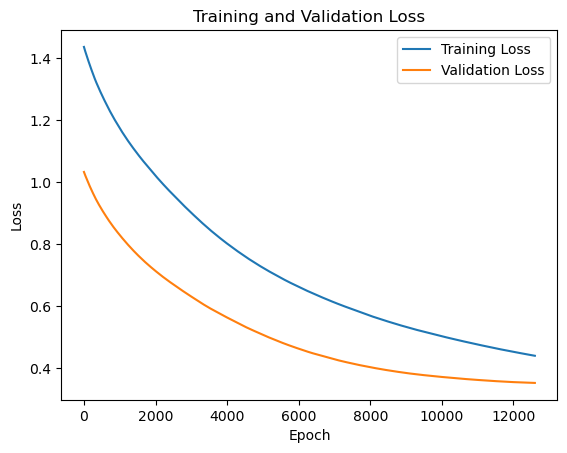

In [26]:
plot_loss(history)

In [51]:
preds_on_trained = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [52]:
def compare_predict(preds_on_trained, preds_on_untrained, y_test):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, preds_on_trained, color='blue', label='Predictions (Trained)', alpha=0.5)
    plt.scatter(y_test, preds_on_untrained, color='red', label='Predictions (Untrained)', alpha=0.5)

    plt.plot(y_test, y_test, color='black', linestyle='--', label='Perfect Predictions')

    plt.title('Comparison of Predictions: Trained vs Untrained')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

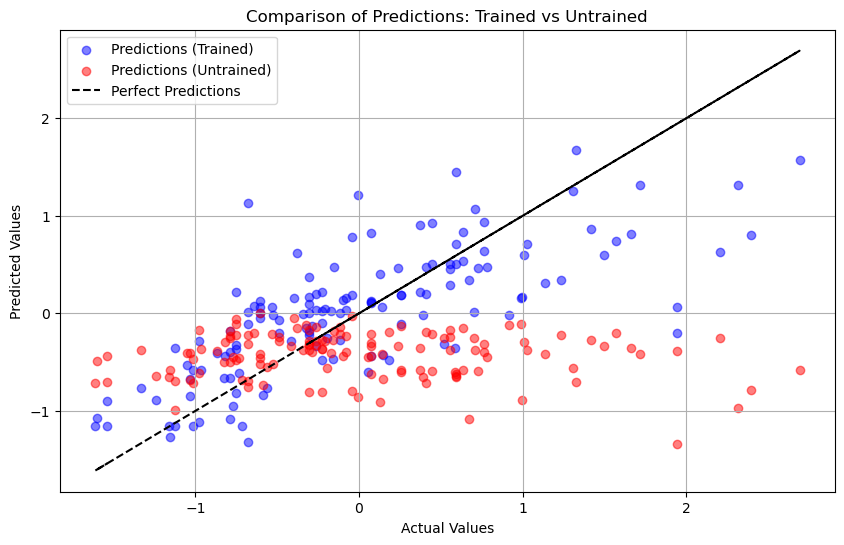

In [53]:
compare_predict(preds_on_trained,preds_on_untrained,y_test)